Using cpu device
train_x tensor([[ 2.7458, -3.1053],
        [ 1.1985, -3.0571],
        [ 0.8819,  3.5795],
        [-3.4619,  2.3194],
        [-1.3866,  3.4670],
        [ 4.7968, -2.0526],
        [ 2.7871,  1.8515],
        [ 2.5455,  2.4585],
        [-1.2653,  3.0032],
        [ 4.6756, -1.2881],
        [ 0.0824, -0.9998],
        [ 0.8941,  1.5740],
        [-0.8126,  2.8645],
        [-4.9403,  2.8900],
        [-0.6122,  4.7236],
        [-2.2993,  1.6765]])
train_y tensor([-0.6138, -0.0649, -0.1337, -0.3657, -1.9306, -1.4599,  0.0702, -0.2142,
        -1.9441, -0.7204,  0.6228,  0.7764, -1.6879,  0.0056, -0.5635, -0.8517])
Starting Training of the model
****************************************************************
Epoch 0/2000 Done, Total Loss: 0.7484000027179718
net_outputs_test[0] [-1.5803978  -1.5393617  -1.4984449  ... -0.28545913 -0.2715269
 -0.2575946 ]
Prediction min: -1.5803978
Prediction max: -0.16955352


/Users/chexuanyou/anaconda3/envs/myenv/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1024])) that is different to the input size (torch.Size([1024, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/chexuanyou/anaconda3/envs/myenv/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


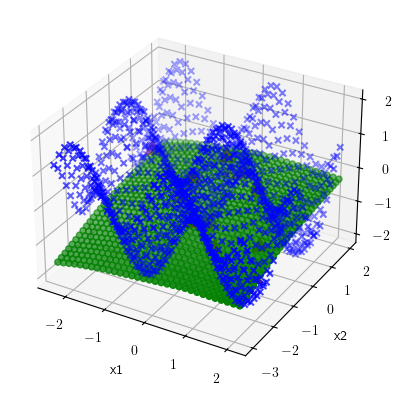

****************************************************************
Epoch 500/2000 Done, Total Loss: 0.10284960828721523
net_outputs_test[0] [3.3588176  3.27456    3.1903021  ... 0.4851071  0.53159904 0.57809114]
Prediction min: -2.699461
Prediction max: 3.3588176


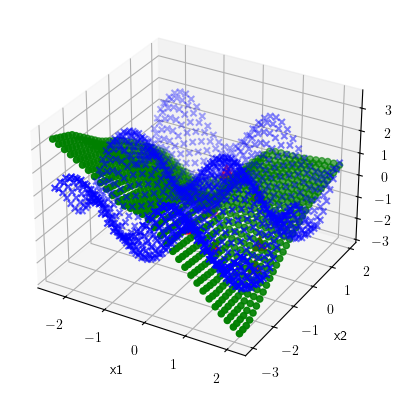

****************************************************************
Epoch 1000/2000 Done, Total Loss: 0.02473953552544117
net_outputs_test[0] [ 2.2808685  2.2359738  2.1910772 ... -1.3691826 -1.4195894 -1.4699969]
Prediction min: -3.1872985
Prediction max: 2.2808685


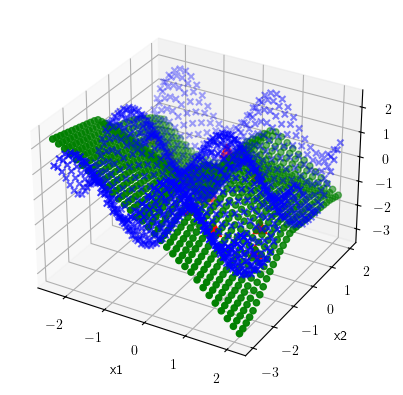

****************************************************************
Epoch 1500/2000 Done, Total Loss: 0.006036300677806139
net_outputs_test[0] [ 1.5915778  1.6088326  1.6260904 ... -2.4674258 -2.5947895 -2.722153 ]
Prediction min: -3.645382
Prediction max: 1.6260904


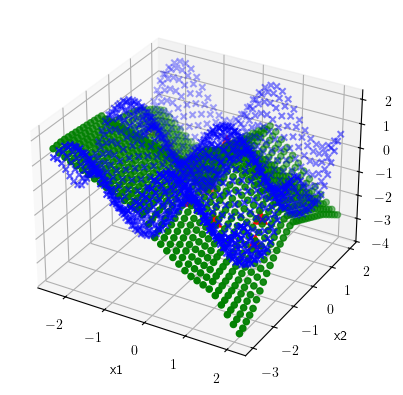

MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
)
net_outputs_test[0] [ 0.7185819   0.7712455   0.82390755 ... -2.8519282  -3.0180542
 -3.1841812 ]
Prediction min: -3.86786
Prediction max: 1.272427


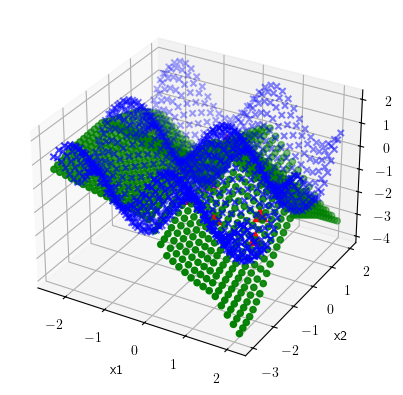

MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
)

Final Train Loss: 0.0016
Final Test Loss: 2.2933


In [ ]:
###############################################Modified Code to 3D#########################################################
##########################################3D no noise no Normalization#####################################################
# Import matplotlib for plotting purposes
import matplotlib
matplotlib.rcParams["text.usetex"] = True
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Sometimes, we need Numpy, but wherever possible, we prefer torch.
import numpy as np

# Import PyTorch
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# Float (32 bit) or Double (64 bit) precision? Choose!
torch.set_default_dtype(torch.float32)#64)
torch.set_num_threads(4) # Use _maximally_ 4 CPU cores

# This is a list to store the hyperparameters of the training
hyperparam_log = []

#device = torch.device("cpu")
# Choose a device for major calculations (if there is a special GPU card, you usually want that).
# My GPU is not very performant for double precision, so I stay on CPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")
device = torch.device(device)

# File path for saving the trained NN later.
# If only providing the file name (like here), the file will be generated in the same folder as the Python script
model_file = "mymodel.torch"

## The following script shows a data-driven training of a Neural Network.
## The data is generated in this script, too, by sampling from a function.
## The variables below are used to control this sampling
samples = 16
sample_min = -5
sample_max = 5
sample_span = sample_max - sample_min

## These parameters are usual hyperparameters of the NN and its training.
batch_size = 8 # How many samples shall be presented to the NN, before running another optimizer step?
hidden_dim = 16 # How many neurons shall there be in the hidden layer(s)?
input_dim = 2 # Input dimension of the NN (i.e. how many neurons are in the input layer?)
output_dim = 1 # Some for output

epochs = 2000 # Number of training iterations to be performed
lr = 0.002 # Which learning rate is passed to the training algorithm?

## Choose a criterion to evaluate the results. Here, we choose Mean Square error.
## The term "loss" means about the same as "remaining error" or "residual".
criterion = nn.MSELoss(reduction="mean")

## Here, we create the training data. In this example, we draw samples within the sampling interval and then pass it to
## e.g. the sin function (choose other functions to experiment with this script)
train_x = (sample_span * torch.rand(samples, 2) + sample_min * torch.ones(samples, 2))
train_y = torch.sin(train_x[:, 0]) + torch.cos(train_x[:, 1]) ##torch.pow(test_x, 2)

## Here, we create the test data. To show the effect of extrapolation and the detailed behavior of the NN,
## we choose points a bit outside the interval that we used for sampling training data. Also, we very dense points.
# test_x = torch.zeros(20*samples, 2)
# test_x[:, 0] = torch.linspace(sample_min - 0.5*sample_span, sample_max + 0.5*sample_span, test_x.size()[0])
# test_x[:, 1] = torch.linspace(sample_min - 0.5*sample_span, sample_max + 0.5*sample_span, test_x.size()[0])

# create test_x with meshgrid
grid_size = int(samples ** 0.5) * 2 
margin = 1  # only extend 1. from -5 to 5, extend to -6 to 6 
x1 = torch.linspace(sample_min - margin, sample_max + margin, 2*samples)
x2 = torch.linspace(sample_min - margin, sample_max + margin, 2*samples)
x1, x2 = torch.meshgrid(x1, x2) 
test_x = torch.zeros(2*samples*2*samples, 2)
test_x[:, 0] = x1.reshape(-1)
test_x[:, 1] = x2.reshape(-1)
test_y = torch.sin(test_x[:, 0]) + torch.cos(test_x[:, 1]) ##torch.pow(test_x, 2)

# standardize the data
scaler = StandardScaler()
train_x = torch.tensor(scaler.fit_transform(train_x), dtype=torch.float32)
test_x = torch.tensor(scaler.transform(test_x), dtype=torch.float32)

print ("train_x", train_x)
print ("train_y", train_y)

## We want a DataLoader to handle batching and shuffling of the training data for us.
## The DataLoader needs a TensorDataset, hence we create one from the Training data.
train_data = TensorDataset(train_x, train_y)
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=False)


## This class creates the actual Neural Network.
class MLNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLNet, self).__init__()
        self.hidden_dim = hidden_dim

        ## In this case, I decided to pack the layers into a single container of type nn.Sequential
        ## This container is useful for Fully Connected NNs, where the output of each layer is just fed into the following layer.
        ## added dropout layer, which is a regularization technique to prevent overfitting
        self.fcnn1 = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            #nn.Tanh(),
            nn.ReLU(),
            #nn.Linear(hidden_dim, hidden_dim),
            #nn.ReLU(),
            #nn.Linear(hidden_dim, hidden_dim),
            #nn.Dropout(p=0.05),  # Dropout layer with 30% of neurons being dropped，but it's not working well，the model underfitting, so change to 0.05
            #nn.ReLU(),
            nn.Linear(hidden_dim, output_dim),
        ) ## That network here has exactly 1 hidden layer (comment out some lines or write new ones to add more layers)
        ## nn.Linear is in the pictures represented by the arrows and has the weights (and biases) which are the
        ## parameters of the NN.
        ## nn.ReLU and Tanh are examples for activation functions - in the pictures, these are the bubbles / neurons.
        ## Usually, the pattern is interchanging between one linear layer, one activation function, one linear layer, one activation function and so on

    ## It is required to write a function that is executed when calling the NN model.
    ## Usually, it takes the input data and passes it through the layers.
    ## Here, it is sufficient to call the sequential container since this container does exactly this job.
    ## But this function "forward" could also be used to set up more complex NN architectures with more complex data flows
    def forward(self, x):
        out = self.fcnn1(x)
        return out

## This function performs a test run with the NN.
## It takes the NN model and the test data, passes the test inputs through the network and
## compares it with the target values = test outputs = targets
## and based on that calculates the loss value
def evaluate(model, test_x, test_y):
    ## For testing, we don't need the autograd feature/ protocol of all calculation steps
    ## So, save some time and disable grad tracking.
    with torch.no_grad():
        model.eval() ## Set the NN model into evaluation mode
        outputs = [] ## Create empty lists to store the results
        targets = []
        testlosses = []

        out = model(test_x.to(device)) ## Call the model, i.e. perform the actual inference

        ## Move the output quantities to the CPU, detach them from the tensor operation book-keeping and convert them to numpy arrays/ vectors.
        ## This is all necessary for plotting
        outputs.append(out.cpu().detach().numpy())
        targets.append(test_y.cpu().detach().numpy())
        testlosses.append(criterion(out, test_y.to(device)).item())

    ## Now return that in form of a triple of variables
    return outputs, targets, testlosses

## This calls the evaluate function and takes care of the plotting.
def eval_and_plot(model):
        ## matplotlib tries to be similar to the plot functions of matlab  (admittedly, the commands have to begin with "plt.", but the rest
        ## is quite similar.)
        # create a 3D plot
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        ## Call the network on the test data
        net_outputs_test, targets_test, testlosses = evaluate(model, test_x, test_y)   
        # Plot the targets first in blue (which means to plot the actual function over the whole test interval)
        #ax.plot(test_x[:, 0], test_x[:, 1], targets_test[0], color="-b", label="Target")
        ax.scatter(test_x[:, 0], test_x[:, 1], targets_test[0], c='b', marker='x', label='Target')
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('y')

        ## Call the network on the training data
        net_outputs_train, targets_train, testlosses = evaluate(model, train_x, train_y)
        ## First, plot the targets in red, i.e. plot the training data set
        ax.scatter(train_x[:, 0], train_x[:, 1], targets_train[0], c='r', s=100, marker='^', label='Target')

        ## Now, plot the output of the NN on the whole test interval in green
        ## This allows us to see how the NN performs for interpolation as well as for extrapolation
        ax.scatter(test_x[:, 0], test_x[:, 1], net_outputs_test[0].reshape(-1), c='g', marker='o', label='Learned')
        print("net_outputs_test[0]", net_outputs_test[0].reshape(-1))

        print("Prediction min:", net_outputs_test[0].min())
        print("Prediction max:", net_outputs_test[0].max())


        ## All plotting is done, open the plot window
        plt.show()

## This function plots the overfitting effect

## That function takes care of the whole training
def train(train_loader, learn_rate, EPOCHS):  # 10):

    # Instantiate the NN
    model = MLNet(input_dim, hidden_dim, output_dim)
    model.to(device) # and move it to the "device" (in case we use a GPU)

    ## Choose an optimizer. Adam is quite robust and thus very popular. Technically, it's based on
    ## gradient descent, but mixes in the gradient of the last time step to improve robustness.
    ## It is given the model parameters, which are the weights and biases of the Linear layers
    ## and the learn_rate. 
    # add L2 regularization(weight_decay) to the optimizer
    #optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=0)
    print("Starting Training of the model")

    # StepLR scheduler: every 'step_size' epochs, lr = lr * gamma
    #scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=500, gamma=0.3)
    #print("Starting Training of the model with StepLR scheduler")

    # We want to keep track of the losses averaged over each epoch, to plot them in those famous
    # decreasing graphs
    avg_losses = torch.zeros(EPOCHS)

    ## In the end, epoch is just another word for "training iteration", so we have a simple for loop.
    for epoch in range(EPOCHS):
        model.train() # Set the model into train mode
        avg_loss = 0. # initializations
        counter = 0

        ## DataLoader is iterable so that this for-loop loops over the batches of the training data set
        ## and the DataLoader gives us readily paired combinations of training inputs and targets (which are called x and label, here).
        ## The term "label" is more common in classification, but used for all supervised training tasks
        for x, label in train_loader:
            counter += 1 # We count, how many batches we did within the current epoch
            model.zero_grad() # Important: reset the gradients of the NN before passing the training inputs.
            # Otherwise, we would accumulate the gradient information which might ruin the results
            # or simply run into PyTorch exceptions

            ## Now, we can call the model on the training inputs.
            ## Therefor, we move that data to the device (just in case we use a GPU).
            out = model(x.to(device))
            out = out.squeeze(-1) ## The output is a tensor of shape (batch_size, 1), but we want to have a tensor of shape (batch_size)
            loss = criterion(out, label) # both are [batch_size,1]


            ## Here, the whole magic happens:
            ## PyTorch offers the autograd feature, i.e. calculations on tensors are tracked (there are exceptions, e.g.
            ## this is not possible for in-place operations). This allows to calculate the derivative of each output value
            ## w.r.t. all input values (its "gradient").
            ## In this case, we want to know the derivatives of the loss value w.r.t. all the NN parameters (weights and biases).
            ## Our optimizers are usually based on "Gradient Descent", so we need the gradients...
            loss.backward()
            ## Alright, now let the optimizer do the magic.
            ## We passed the optimizer the NN parameters by reference when we initialized the optimizer.
            ## And the gradient information is stored in the tensors of the parameters, too (not in the loss or so).
            ## That's why the step() function does not require any arguments.
            optimizer.step()

            ## For the plot at the end, save the loss values
            avg_loss += loss.item()

        ## It's an average loss, so divide by the number of samples/ size of the training data set
        avg_losses[epoch] = avg_loss / len(train_loader)

        ## StepLR scheduler step, update learning rate, every 500 epochs reduce lr by 0.3
    #    scheduler.step()

        ## To understand how the NN learns, all 500 epochs a plot is shown (Close the plot window and wait for the next plot)
        if epoch%500 == 0:
            print("****************************************************************")
            print("Epoch {}/{} Done, Total Loss: {}".format(epoch, EPOCHS, avg_loss / len(train_loader)))
            eval_and_plot(model)
    #       current_lr = scheduler.get_last_lr()[0]
    #       print(f"Current LR after scheduler step: {current_lr}")
    if epoch == EPOCHS:
        print("training progress done, {}epochs intotal, Total Loss: {}".format(epoch, avg_loss / len(train_loader)))
    
    ## Now save the trained model with all its properties to the model_file
    torch.save(model, model_file)

    ## And return the model in case we want to use it for other tasks
    return model


## As the functions written before are just function definitions,
## those functions still have to be called.
## This is done here.
## Train the model
model = train(train_loader, lr, epochs)

print(model)

## Test that saving the model worked: load it from file
model = torch.load(model_file)
## and evaluate and plot once
eval_and_plot(model)

print(model)

# Evaluate and print train loss
with torch.no_grad():
    model.eval()
    train_out = model(train_x.to(device)).squeeze(-1)
    final_train_loss = criterion(train_out, train_y.to(device)).item()

# Evaluate and print test loss
test_outputs, test_targets, test_loss = evaluate(model, test_x, test_y)
final_test_loss = test_loss[0]  # Since test_loss is a list, take the first value

# Print the final train and test losses
print(f"\nFinal Train Loss: {final_train_loss:.4f}")
print(f"Final Test Loss: {final_test_loss:.4f}")


Using cpu device

**Running training with lr=0.001, hidden_dim=16, batch_size=8, epochs=1600
Epoch 1599/1600, Loss=0.0967
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
)
lr=0.001, hidden_dim=16, batch_size=8, epochs=1600

Final Train loss: 0.0966, Test loss: 1.1605 **

net_outputs_test[0] [-0.07812214 -0.02234418  0.04523859 ... -0.35345364 -0.40568924
 -0.4482323 ]
Prediction min: -1.2255651
Prediction max: 2.0285916


/Users/chexuanyou/anaconda3/envs/myenv/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1024])) that is different to the input size (torch.Size([1024, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/chexuanyou/anaconda3/envs/myenv/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


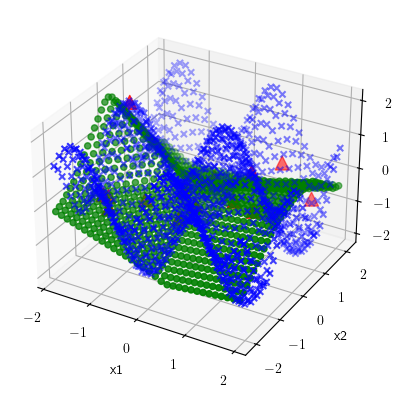

************************************************************************

**Running training with lr=0.002, hidden_dim=16, batch_size=8, epochs=1600
Epoch 1599/1600, Loss=0.0510
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
)
lr=0.002, hidden_dim=16, batch_size=8, epochs=1600

Final Train loss: 0.0509, Test loss: 1.5196 **

net_outputs_test[0] [ 0.5461085   0.5168446   0.48758185 ... -0.5288789  -0.6587125
 -0.6797497 ]
Prediction min: -2.2988787
Prediction max: 2.4701242


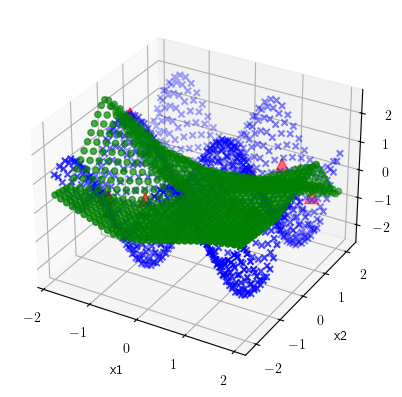

************************************************************************

**Running training with lr=0.002, hidden_dim=32, batch_size=8, epochs=1600
Epoch 1599/1600, Loss=0.0034
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=1, bias=True)
  )
)
lr=0.002, hidden_dim=32, batch_size=8, epochs=1600

Final Train loss: 0.0033, Test loss: 0.6785 **

net_outputs_test[0] [ 1.0135618   0.91974914  0.82593644 ... -1.3990622  -1.2592767
 -1.119492  ]
Prediction min: -2.0988808
Prediction max: 2.3269565


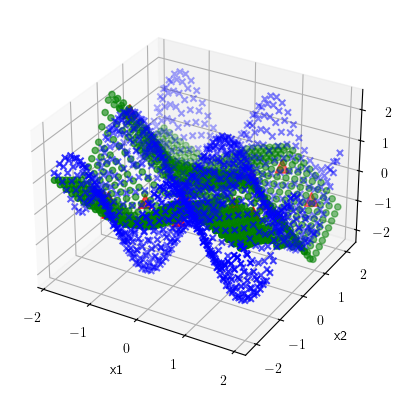

************************************************************************

**Running training with lr=0.002, hidden_dim=16, batch_size=8, epochs=2000
Epoch 1999/2000, Loss=0.0047
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
)
lr=0.002, hidden_dim=16, batch_size=8, epochs=2000

Final Train loss: 0.0046, Test loss: 1.0697 **

net_outputs_test[0] [ 0.3728549  0.3354057  0.2979548 ... -1.382391  -1.2235513 -1.0647119]
Prediction min: -3.0324688
Prediction max: 2.6583471


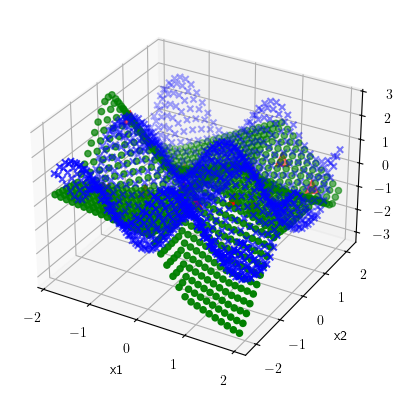

************************************************************************

**Running training with lr=0.003, hidden_dim=16, batch_size=8, epochs=1600
Epoch 1599/1600, Loss=0.0083
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
)
lr=0.003, hidden_dim=16, batch_size=8, epochs=1600

Final Train loss: 0.0083, Test loss: 0.7599 **

net_outputs_test[0] [ 1.0714142   0.9726239   0.87383395 ... -1.4249778  -1.3238891
 -1.2228013 ]
Prediction min: -1.9304185
Prediction max: 3.0443373


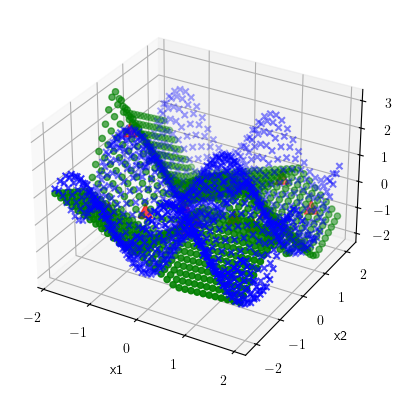

************************************************************************

**Running training with lr=0.003, hidden_dim=32, batch_size=8, epochs=1600
Epoch 1599/1600, Loss=0.0011
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=1, bias=True)
  )
)
lr=0.003, hidden_dim=32, batch_size=8, epochs=1600

Final Train loss: 0.0011, Test loss: 0.7919 **

net_outputs_test[0] [ 1.2486798   1.1091243   0.96956915 ... -1.3704649  -1.2246531
 -1.0788417 ]
Prediction min: -1.9537114
Prediction max: 2.883191


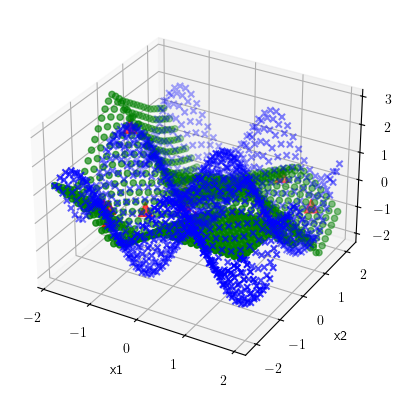

************************************************************************

**Running training with lr=0.003, hidden_dim=32, batch_size=8, epochs=2000
Epoch 1999/2000, Loss=0.0002
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=1, bias=True)
  )
)
lr=0.003, hidden_dim=32, batch_size=8, epochs=2000

Final Train loss: 0.0001, Test loss: 2.5647 **

net_outputs_test[0] [ 0.1735989   0.14630032  0.09874151 ... -1.5709115  -1.3603655
 -1.3351052 ]
Prediction min: -6.2752104
Prediction max: 2.8164225


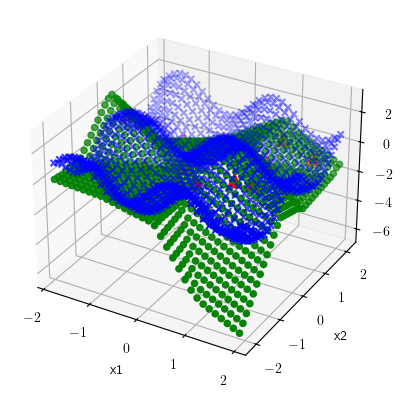

************************************************************************


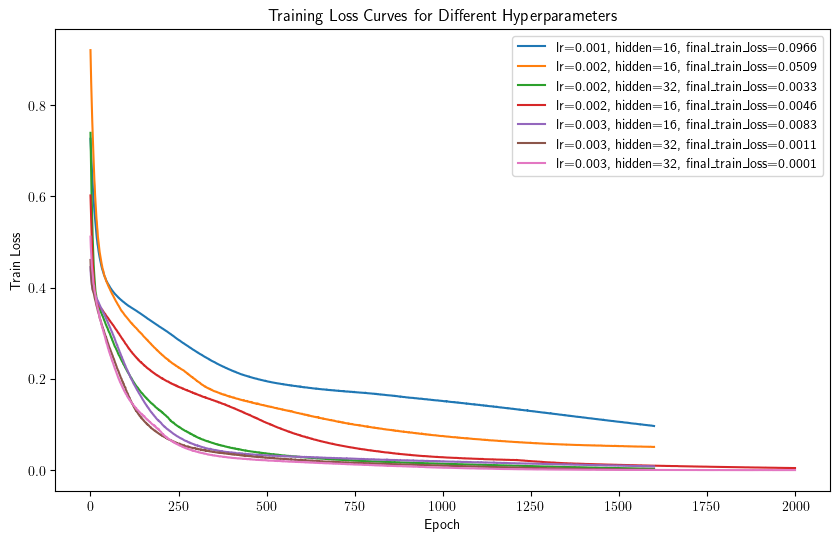


Comparison of final results:
Config: lr=0.001, hidden_dim=16, epoch=1600 => Train Loss=0.0966, Test Loss=1.1605
Config: lr=0.002, hidden_dim=16, epoch=1600 => Train Loss=0.0509, Test Loss=1.5196
Config: lr=0.002, hidden_dim=32, epoch=1600 => Train Loss=0.0033, Test Loss=0.6785
Config: lr=0.002, hidden_dim=16, epoch=2000 => Train Loss=0.0046, Test Loss=1.0697
Config: lr=0.003, hidden_dim=16, epoch=1600 => Train Loss=0.0083, Test Loss=0.7599
Config: lr=0.003, hidden_dim=32, epoch=1600 => Train Loss=0.0011, Test Loss=0.7919
Config: lr=0.003, hidden_dim=32, epoch=2000 => Train Loss=0.0001, Test Loss=2.5647


In [115]:
###############################################Modified Code to 3D#########################################################
##########################################with difference Hyperparameters#####################################################
# Import matplotlib for plotting purposes
import matplotlib
matplotlib.rcParams["text.usetex"] = True
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Sometimes, we need Numpy, but wherever possible, we prefer torch.
import numpy as np

# Import PyTorch
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# Float (32 bit) or Double (64 bit) precision? Choose!
torch.set_default_dtype(torch.float32)#64)
torch.set_num_threads(4) # Use _maximally_ 4 CPU cores

# This is a list to store the losses of the different hyperparameter configurations
train_losses_all = []
test_losses_all = []
models = []

# This is a list to store the hyperparameters of the training
# hyperparam_log = []

#device = torch.device("cpu")
# Choose a device for major calculations (if there is a special GPU card, you usually want that).
# My GPU is not very performant for double precision, so I stay on CPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")
device = torch.device(device)

# File path for saving the trained NN later.
# If only providing the file name (like here), the file will be generated in the same folder as the Python script
model_file = "mymodel.torch"

## The following script shows a data-driven training of a Neural Network.
## The data is generated in this script, too, by sampling from a function.
## The variables below are used to control this sampling
samples = 16
sample_min = -5
sample_max = 5
sample_span = sample_max - sample_min

## These parameters are usual hyperparameters of the NN and its training.
# batch_size = 8 # How many samples shall be presented to the NN, before running another optimizer step?
# hidden_dim = 16 # How many neurons shall there be in the hidden layer(s)?
input_dim = 2 # Input dimension of the NN (i.e. how many neurons are in the input layer?)
output_dim = 1 # Some for output

epochs = 2000 # Number of training iterations to be performed
lr = 0.002 # Which learning rate is passed to the training algorithm?

## Choose a criterion to evaluate the results. Here, we choose Mean Square error.
## The term "loss" means about the same as "remaining error" or "residual".
criterion = nn.MSELoss(reduction="mean")

## Here, we create the training data. In this example, we draw samples within the sampling interval and then pass it to
## e.g. the sin function (choose other functions to experiment with this script)
train_x = (sample_span * torch.rand(samples, 2) + sample_min * torch.ones(samples, 2))
train_y = torch.sin(train_x[:, 0]) + torch.cos(train_x[:, 1]) ##torch.pow(test_x, 2)

## This function logs the hyperparameters of the training
def log_hyperparameters(config, train_loss, test_loss, train_losses):
    hyperparam_log.append({
        "learning_rate": config["lr"],
        "hidden_dim": config["hidden_dim"],
        "batch_size": config["batch_size"],
        "epochs": config["epochs"],
        "final_train_loss": train_loss,
        "final_test_loss": test_loss,
        "train_losses": train_losses  # Include train_losses here
    })

# print ("train_x", train_x)
# print ("train_y", train_y)

## Here, we create the test data. To show the effect of extrapolation and the detailed behavior of the NN,
## we choose points a bit outside the interval that we used for sampling training data. Also, we very dense points.
# test_x = torch.zeros(20*samples, 2)
# test_x[:, 0] = torch.linspace(sample_min - 0.5*sample_span, sample_max + 0.5*sample_span, test_x.size()[0])
# test_x[:, 1] = torch.linspace(sample_min - 0.5*sample_span, sample_max + 0.5*sample_span, test_x.size()[0])

# create test_x with meshgrid
grid_size = int(samples ** 0.5) * 2 
margin = 1  # only extend 1. from -5 to 5, extend to -6 to 6 
x1 = torch.linspace(sample_min - margin, sample_max + margin, 2*samples)
x2 = torch.linspace(sample_min - margin, sample_max + margin, 2*samples)
x1, x2 = torch.meshgrid(x1, x2) 
test_x = torch.zeros(2*samples*2*samples, 2)
test_x[:, 0] = x1.reshape(-1)
test_x[:, 1] = x2.reshape(-1)
test_y = torch.sin(test_x[:, 0]) + torch.cos(test_x[:, 1]) ##torch.pow(test_x, 2)

# standardize the data
scaler = StandardScaler()
train_x = torch.tensor(scaler.fit_transform(train_x), dtype=torch.float32)
test_x = torch.tensor(scaler.transform(test_x), dtype=torch.float32)

## We want a DataLoader to handle batching and shuffling of the training data for us.
## The DataLoader needs a TensorDataset, hence we create one from the Training data.
train_data = TensorDataset(train_x, train_y)
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=False)


## This class creates the actual Neural Network.
class MLNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLNet, self).__init__()
        self.hidden_dim = hidden_dim

        ## In this case, I decided to pack the layers into a single container of type nn.Sequential
        ## This container is useful for Fully Connected NNs, where the output of each layer is just fed into the following layer.
        ## added dropout layer, which is a regularization technique to prevent overfitting
        self.fcnn1 = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            #nn.Tanh(),
            nn.ReLU(),
            #nn.Linear(hidden_dim, hidden_dim),
            #nn.ReLU(),
            #nn.Linear(hidden_dim, hidden_dim),
            #nn.Dropout(p=0.05),  # Dropout layer with 30% of neurons being dropped，but it's not working well，the model underfitting, so change to 0.05
            #nn.ReLU(),
            nn.Linear(hidden_dim, output_dim),
        ) ## That network here has exactly 1 hidden layer (comment out some lines or write new ones to add more layers)
        ## nn.Linear is in the pictures represented by the arrows and has the weights (and biases) which are the
        ## parameters of the NN.
        ## nn.ReLU and Tanh are examples for activation functions - in the pictures, these are the bubbles / neurons.
        ## Usually, the pattern is interchanging between one linear layer, one activation function, one linear layer, one activation function and so on

    ## It is required to write a function that is executed when calling the NN model.
    ## Usually, it takes the input data and passes it through the layers.
    ## Here, it is sufficient to call the sequential container since this container does exactly this job.
    ## But this function "forward" could also be used to set up more complex NN architectures with more complex data flows
    def forward(self, x):
        out = self.fcnn1(x)
        return out

## This function performs a test run with the NN.
## It takes the NN model and the test data, passes the test inputs through the network and
## compares it with the target values = test outputs = targets
## and based on that calculates the loss value
def evaluate(model, test_x, test_y):
    ## For testing, we don't need the autograd feature/ protocol of all calculation steps
    ## So, save some time and disable grad tracking.
    with torch.no_grad():
        model.eval() ## Set the NN model into evaluation mode
        outputs = [] ## Create empty lists to store the results
        targets = []
        testlosses = []

        out = model(test_x.to(device)) ## Call the model, i.e. perform the actual inference

        ## Move the output quantities to the CPU, detach them from the tensor operation book-keeping and convert them to numpy arrays/ vectors.
        ## This is all necessary for plotting
        outputs.append(out.cpu().detach().numpy())
        targets.append(test_y.cpu().detach().numpy())
        testlosses.append(criterion(out, test_y.to(device)).item())

    ## Now return that in form of a triple of variables
    return outputs, targets, testlosses

## This calls the evaluate function and takes care of the plotting.
def eval_and_plot(model):
        ## matplotlib tries to be similar to the plot functions of matlab  (admittedly, the commands have to begin with "plt.", but the rest
        ## is quite similar.)

        # create a 3D plot
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        ## Call the network on the test data
        net_outputs_test, targets_test, testlosses = evaluate(model, test_x, test_y)   
        # Plot the targets first in blue (which means to plot the actual function over the whole test interval)
        #ax.plot(test_x[:, 0], test_x[:, 1], targets_test[0], color="-b", label="Target")
        ax.scatter(test_x[:, 0], test_x[:, 1], targets_test[0], c='b', marker='x', label='Target')
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('y')

        ## Call the network on the training data
        net_outputs_train, targets_train, testlosses = evaluate(model, train_x, train_y)
        ## First, plot the targets in red, i.e. plot the training data set
        ax.scatter(train_x[:, 0], train_x[:, 1], targets_train[0], c='r', s=100, marker='^', label='Target')

        ## Now, plot the output of the NN on the whole test interval in green
        ## This allows us to see how the NN performs for interpolation as well as for extrapolation
        ax.scatter(test_x[:, 0], test_x[:, 1], net_outputs_test[0].reshape(-1), c='g', marker='o', label='Learned')
        print("net_outputs_test[0]", net_outputs_test[0].reshape(-1))

        print("Prediction min:", net_outputs_test[0].min())
        print("Prediction max:", net_outputs_test[0].max())


        ## All plotting is done, open the plot window
        plt.show()

## This function takes care of the whole training
def train(train_loader, lr_run, hidden_dim_run, EPOCHS):
    model = MLNet(input_dim, hidden_dim_run, output_dim).to(device)  # 
    optimizer = torch.optim.Adam(model.parameters(), lr=lr_run, weight_decay=0)
    # print(f"Starting Training of the model with lr={lr_run}, hidden_dim={hidden_dim_run}, epochs={EPOCHS}")

    avg_losses = torch.zeros(EPOCHS)

    for epoch in range(EPOCHS):
        model.train()
        avg_loss = 0.
        counter = 0
        for x, label in train_loader:
            counter += 1
            model.zero_grad()
            out = model(x.to(device)).squeeze(-1)
            loss = criterion(out, label.to(device))
            loss.backward()
            optimizer.step()
            avg_loss += loss.item()
        avg_losses[epoch] = avg_loss / len(train_loader)

    # after training, evaluate the traing and test loss
    final_train_loss = avg_losses[-1].item()
    with torch.no_grad():
        model.eval()
        out_train = model(train_x.to(device)).squeeze(-1)
        final_train_loss = criterion(out_train, train_y.to(device)).item()

        out_test = model(test_x.to(device)).squeeze(-1)
        final_test_loss = criterion(out_test, test_y.to(device)).item()
    
    # plot the loss curve
    if epoch == EPOCHS-1:
        print(f"Epoch {epoch}/{EPOCHS}, Loss={avg_losses[epoch].item():.4f}")
        #eval_and_plot(model)

    # return the trained model, the average losses, and the final training and test loss
    return model, avg_losses.cpu().tolist(), final_train_loss, final_test_loss


## As the functions written before are just function definitions,
## those functions still have to be called.
## This is done here.
## Train the model
# model = train(train_loader, lr, epochs)


## Test that saving the model worked: load it from file
# model = torch.load(model_file)
## and evaluate and plot once
# eval_and_plot(model)

###################### Hyperparameter Search Loop ######################
hyperparam_log = []  # reset hyperparam_log

hyperparam_configs = [
    {"lr":0.001, "hidden_dim":16, "batch_size":8, "epochs":1600},
    {"lr":0.002, "hidden_dim":16, "batch_size":8, "epochs":1600},
    {"lr":0.002, "hidden_dim":32, "batch_size":8, "epochs":1600},
    {"lr":0.002, "hidden_dim":16, "batch_size":8, "epochs":2000},
    {"lr":0.003, "hidden_dim":16, "batch_size":8, "epochs":1600},
    {"lr":0.003, "hidden_dim":32, "batch_size":8, "epochs":1600},
    {"lr":0.003, "hidden_dim":32, "batch_size":8, "epochs":2000},
]

for config in hyperparam_configs:
    lr_run          = config["lr"]
    hidden_dim_run  = config["hidden_dim"]
    batch_size_run  = config["batch_size"]
    epochs_run      = config["epochs"]

    # update hyperparameters to be global variables
    lr         = lr_run
    hidden_dim = hidden_dim_run
    batch_size = batch_size_run
    epochs     = epochs_run

    print(f"\n**Running training with lr={lr}, hidden_dim={hidden_dim}, batch_size={batch_size}, epochs={epochs}")

    # train the model to get the results
    model, train_curve, final_train_loss, final_test_loss = train(train_loader, lr, hidden_dim, epochs)

    # show the model structure
    print(model)

    # save to hyperparam_log
    log_hyperparameters(config, final_train_loss, final_test_loss, train_curve)
    
    print(f"lr={lr}, hidden_dim={hidden_dim}, batch_size={batch_size}, epochs={epochs}\n")
    print(f"Final Train loss: {final_train_loss:.4f}, Test loss: {final_test_loss:.4f} **\n")
    eval_and_plot(model)  # plot the training results
    print("************************************************************************")

###################### Plot multiple curves ######################
plt.figure(figsize=(10,6))
for entry in hyperparam_log:
    plt.plot(entry["train_losses"],
             label=f"lr={entry['learning_rate']}, hidden={entry['hidden_dim']}, final_train_loss={entry['final_train_loss']:.4f}")
plt.xlabel("Epoch")
plt.ylabel("Train Loss")
plt.title("Training Loss Curves for Different Hyperparameters")
plt.legend()
plt.show()

###################### Compare final results ######################
print("\nComparison of final results:")
for entry in hyperparam_log:
    print(f"Config: lr={entry['learning_rate']}, hidden_dim={entry['hidden_dim']}, epoch={entry['epochs']} => Train Loss={entry['final_train_loss']:.4f}, Test Loss={entry['final_test_loss']:.4f}")


## This function is used to plot the hyperparameter logs
#plot_hyperparameter_logs()

Using cpu device

**Running training with lr=0.0001, hidden_dim=16, batch_size=8, epochs=1000
Epoch 999/1000, Loss=0.6002
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
)


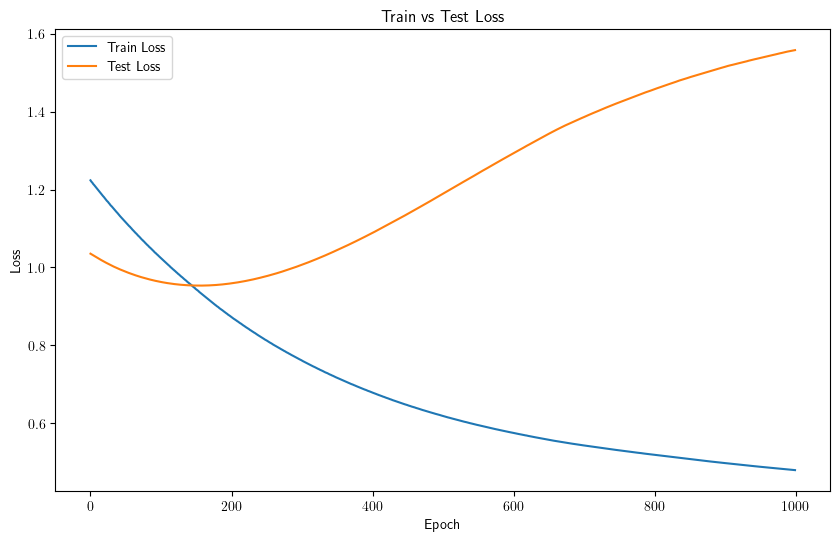

lr=0.0001, hidden_dim=16, batch_size=8, epochs=1000

Final Train loss: 0.6001, Test loss: 1.1409 **

net_outputs_test[0] [-0.2337422  -0.24103662 -0.24833101 ... -0.961419   -0.9713384
 -0.98125803]
Prediction min: -0.98125803
Prediction max: 0.036114417


/Users/chexuanyou/anaconda3/envs/myenv/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1024])) that is different to the input size (torch.Size([1024, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/chexuanyou/anaconda3/envs/myenv/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


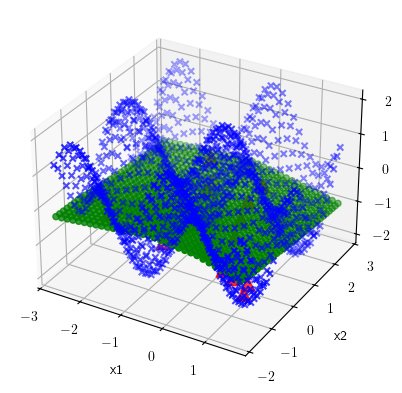

************************************************************************

**Running training with lr=0.001, hidden_dim=16, batch_size=8, epochs=1000
Epoch 999/1000, Loss=0.0518
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
)


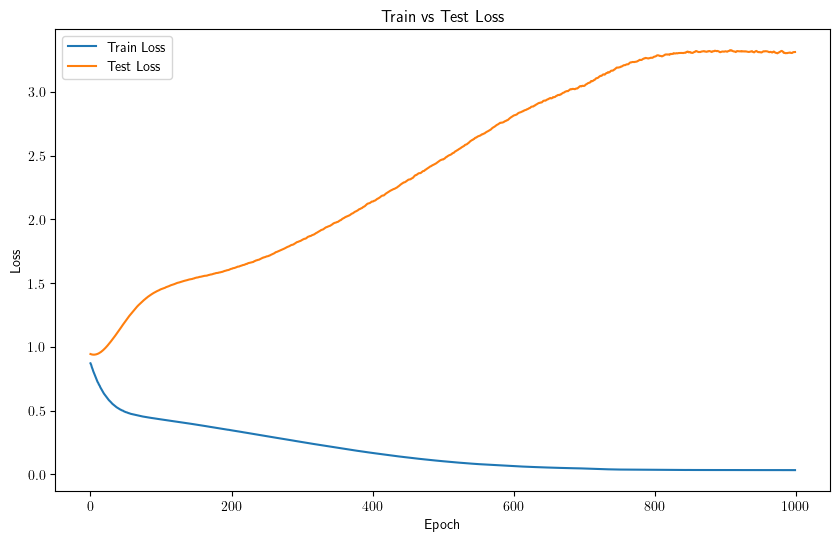

lr=0.001, hidden_dim=16, batch_size=8, epochs=1000

Final Train loss: 0.0517, Test loss: 3.7239 **

net_outputs_test[0] [ 0.37287787  0.060895   -0.2510888  ...  2.2693954   2.3603294
  2.4512637 ]
Prediction min: -3.9016528
Prediction max: 2.4512637


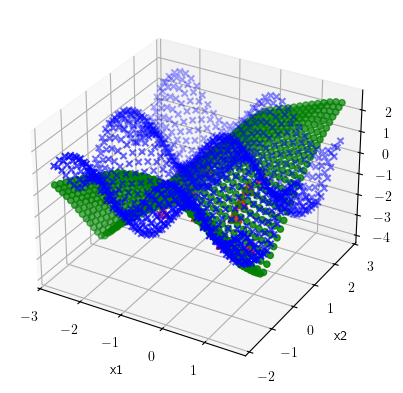

************************************************************************

**Running training with lr=0.001, hidden_dim=16, batch_size=4, epochs=1000
Epoch 999/1000, Loss=0.0379
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
)


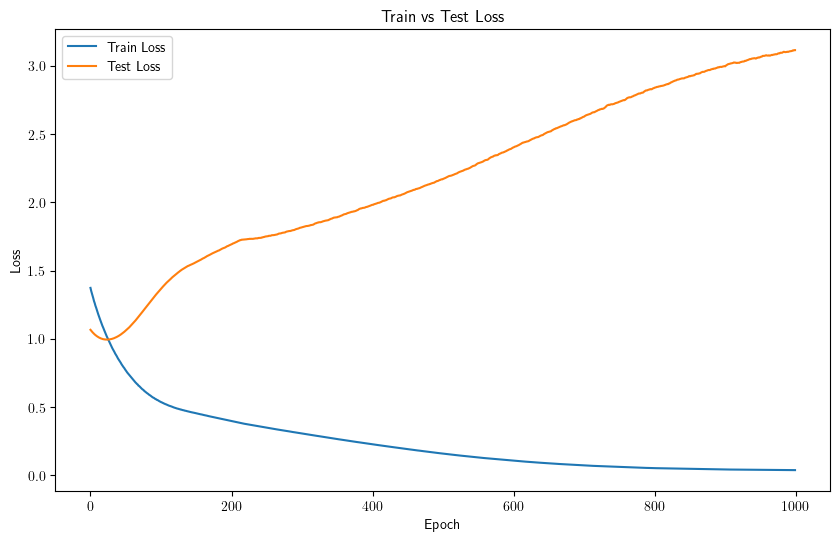

lr=0.001, hidden_dim=16, batch_size=4, epochs=1000

Final Train loss: 0.0378, Test loss: 3.0144 **

net_outputs_test[0] [ 0.44752795  0.1583436  -0.13099904 ...  0.6421056   0.7484615
  0.85481715]
Prediction min: -3.3357713
Prediction max: 2.1471868


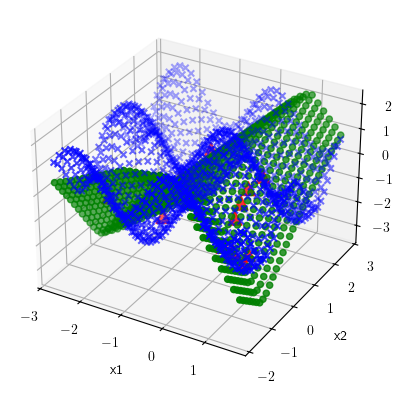

************************************************************************

**Running training with lr=0.02, hidden_dim=16, batch_size=8, epochs=1000
Epoch 999/1000, Loss=0.0269
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
)


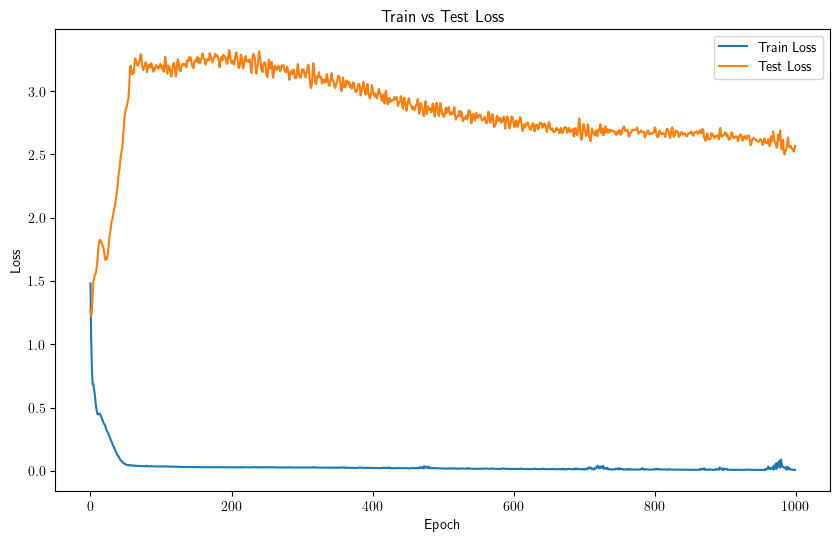

lr=0.02, hidden_dim=16, batch_size=8, epochs=1000

Final Train loss: 0.0258, Test loss: 3.1153 **

net_outputs_test[0] [ 0.46007603  0.10643318 -0.24465814 ... -0.5432091  -0.5188745
 -0.49453983]
Prediction min: -3.7437952
Prediction max: 1.913386


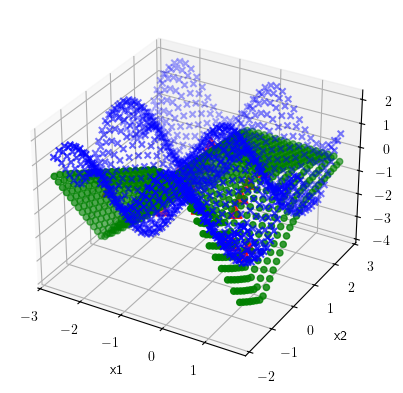

************************************************************************

**Running training with lr=0.002, hidden_dim=32, batch_size=8, epochs=1000
Epoch 999/1000, Loss=0.0253
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=1, bias=True)
  )
)


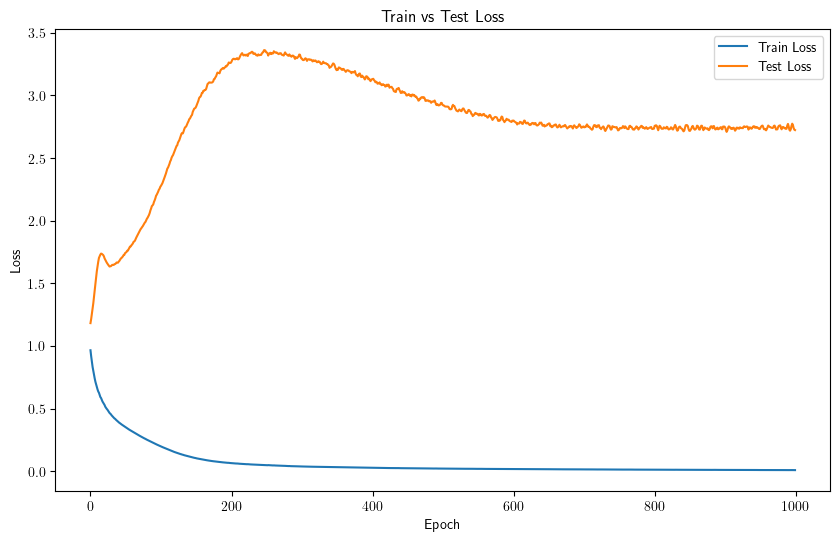

lr=0.002, hidden_dim=32, batch_size=8, epochs=1000

Final Train loss: 0.0253, Test loss: 3.5290 **

net_outputs_test[0] [ 0.39323562  0.05017518 -0.29288554 ...  0.78985566  0.8580672
  0.9106177 ]
Prediction min: -4.096257
Prediction max: 2.2498732


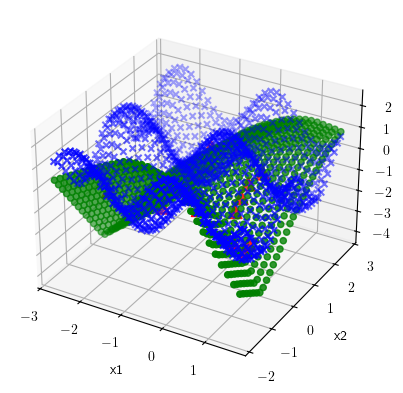

************************************************************************

**Running training with lr=0.002, hidden_dim=16, batch_size=8, epochs=1500
Epoch 1499/1500, Loss=0.0322
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
)


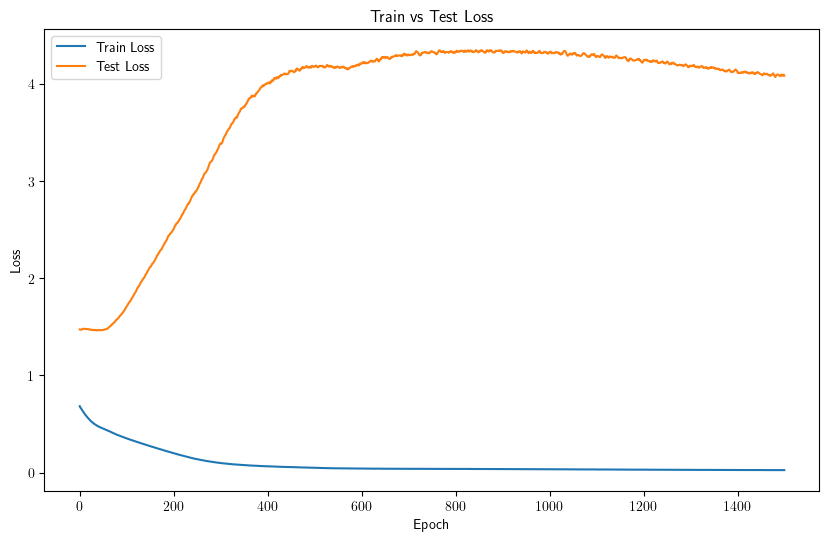

lr=0.002, hidden_dim=16, batch_size=8, epochs=1500

Final Train loss: 0.0322, Test loss: 3.2722 **

net_outputs_test[0] [ 0.37469143  0.03234165 -0.310008   ...  0.2820382   0.3791694
  0.4725863 ]
Prediction min: -3.8859
Prediction max: 2.5789504


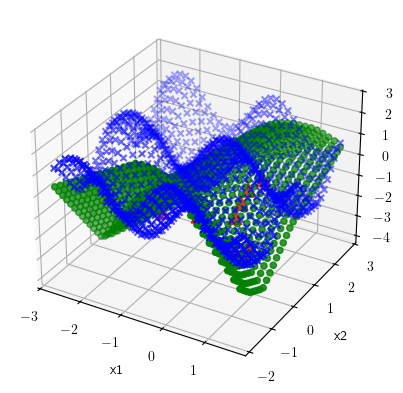

************************************************************************

**Running training with lr=0.003, hidden_dim=16, batch_size=8, epochs=1000
Epoch 999/1000, Loss=0.0323
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
)


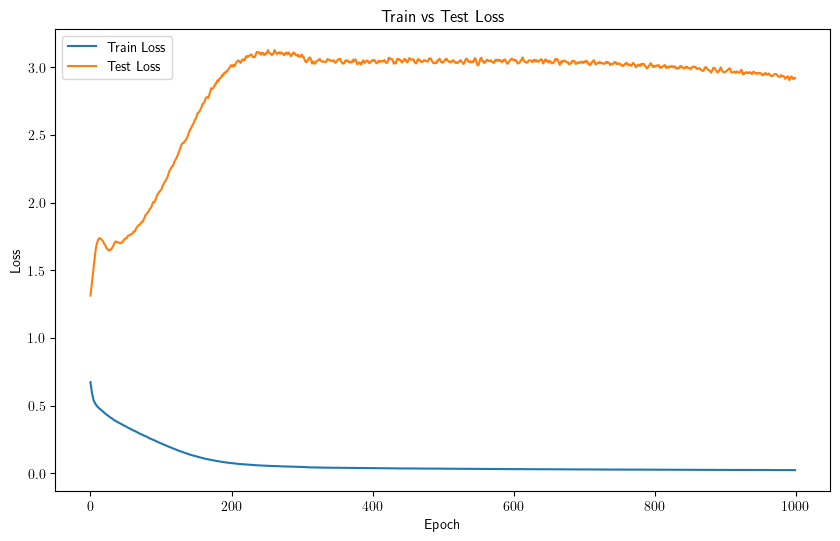

lr=0.003, hidden_dim=16, batch_size=8, epochs=1000

Final Train loss: 0.0322, Test loss: 3.0918 **

net_outputs_test[0] [ 0.3465041   0.02889775 -0.28870893 ...  0.21950327  0.30594277
  0.37234244]
Prediction min: -3.682942
Prediction max: 2.253236


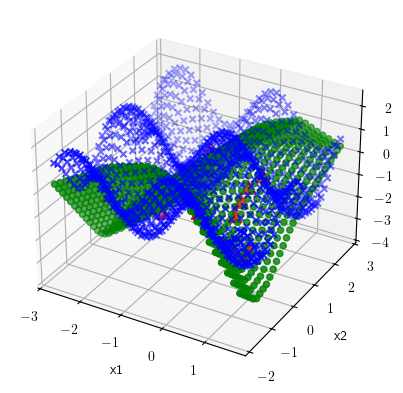

************************************************************************

**Running training with lr=0.003, hidden_dim=32, batch_size=8, epochs=1000
Epoch 999/1000, Loss=0.0219
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=1, bias=True)
  )
)


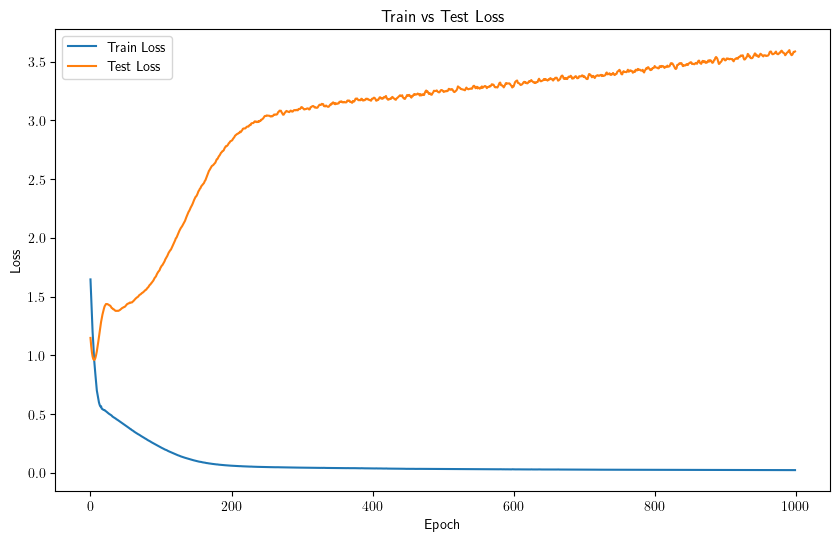

lr=0.003, hidden_dim=32, batch_size=8, epochs=1000

Final Train loss: 0.0215, Test loss: 3.7406 **

net_outputs_test[0] [ 0.46443778  0.1332604  -0.20000803 ...  1.5934      1.716394
  1.8393881 ]
Prediction min: -4.0111523
Prediction max: 2.3879454


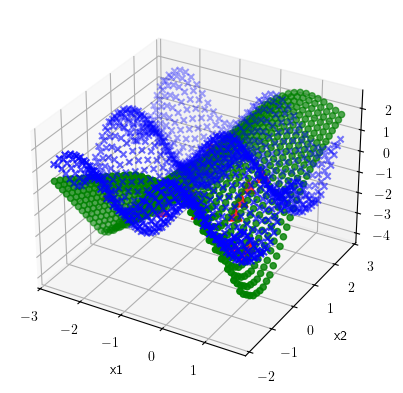

************************************************************************

**Running training with lr=0.003, hidden_dim=32, batch_size=8, epochs=1500
Epoch 1499/1500, Loss=0.0189
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=1, bias=True)
  )
)


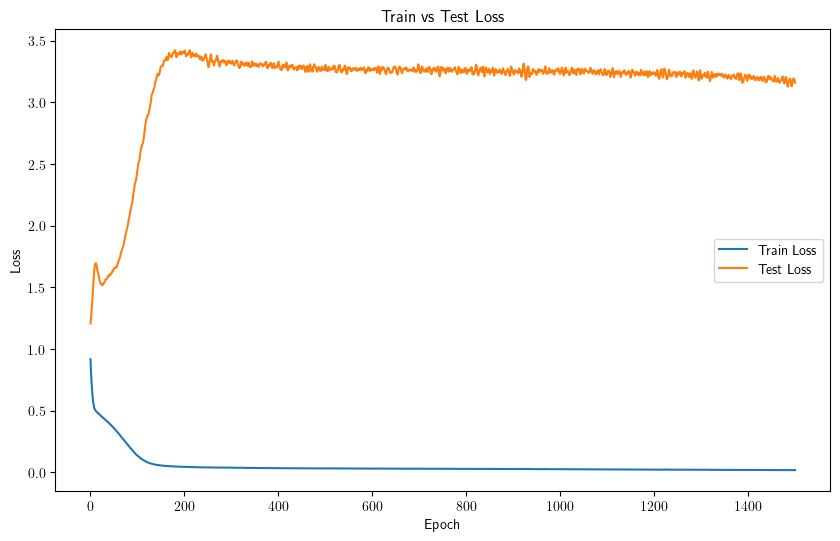

lr=0.003, hidden_dim=32, batch_size=8, epochs=1500

Final Train loss: 0.0183, Test loss: 3.8107 **

net_outputs_test[0] [ 0.41708654  0.05588408 -0.3383721  ...  1.9006286   2.0760663
  2.2263498 ]
Prediction min: -3.8515902
Prediction max: 2.753338


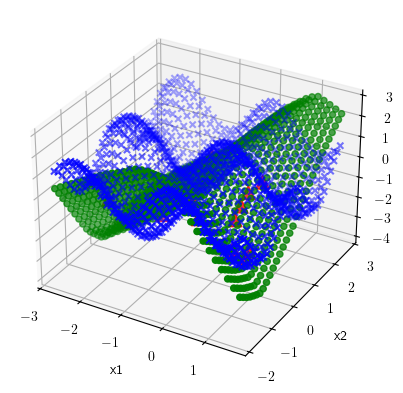

************************************************************************


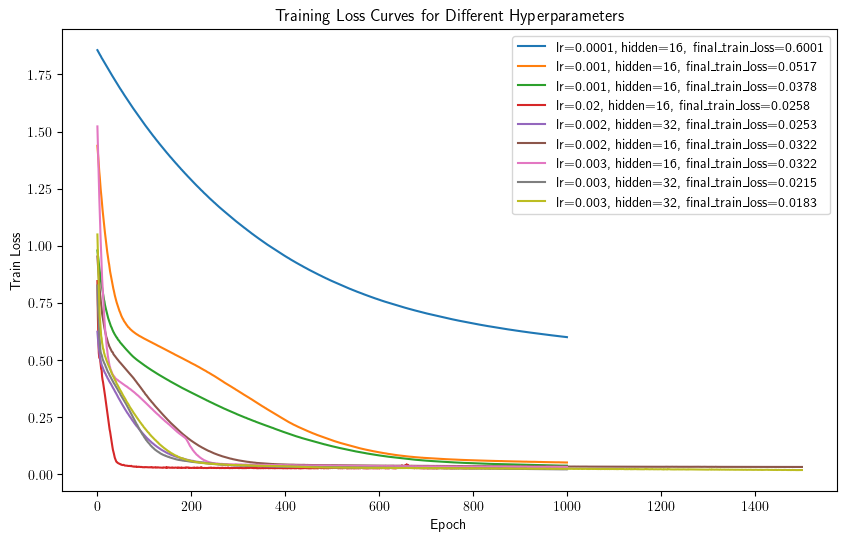


Comparison of final results:
Config: lr=0.0001, hidden_dim=16, epoch=1000 => Train Loss=0.6001, Test Loss=1.1409
Config: lr=0.001, hidden_dim=16, epoch=1000 => Train Loss=0.0517, Test Loss=3.7239
Config: lr=0.001, hidden_dim=16, epoch=1000 => Train Loss=0.0378, Test Loss=3.0144
Config: lr=0.02, hidden_dim=16, epoch=1000 => Train Loss=0.0258, Test Loss=3.1153
Config: lr=0.002, hidden_dim=32, epoch=1000 => Train Loss=0.0253, Test Loss=3.5290
Config: lr=0.002, hidden_dim=16, epoch=1500 => Train Loss=0.0322, Test Loss=3.2722
Config: lr=0.003, hidden_dim=16, epoch=1000 => Train Loss=0.0322, Test Loss=3.0918
Config: lr=0.003, hidden_dim=32, epoch=1000 => Train Loss=0.0215, Test Loss=3.7406
Config: lr=0.003, hidden_dim=32, epoch=1500 => Train Loss=0.0183, Test Loss=3.8107


In [119]:
###############################################Modified Code to 3D#########################################################
#############################different Hyperparameters with noise without normalization test loss#####################################################
# Import matplotlib for plotting purposes
import matplotlib
matplotlib.rcParams["text.usetex"] = True
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Sometimes, we need Numpy, but wherever possible, we prefer torch.
import numpy as np

# Import PyTorch
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# Float (32 bit) or Double (64 bit) precision? Choose!
torch.set_default_dtype(torch.float32)#64)
torch.set_num_threads(4) # Use _maximally_ 4 CPU cores

# This is a list to store the losses of the different hyperparameter configurations
train_losses_all = []
test_losses_all = []
models = []

# This is a list to store the hyperparameters of the training
# hyperparam_log = []

#device = torch.device("cpu")
# Choose a device for major calculations (if there is a special GPU card, you usually want that).
# My GPU is not very performant for double precision, so I stay on CPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")
device = torch.device(device)

# File path for saving the trained NN later.
# If only providing the file name (like here), the file will be generated in the same folder as the Python script
model_file = "mymodel.torch"

## The following script shows a data-driven training of a Neural Network.
## The data is generated in this script, too, by sampling from a function.
## The variables below are used to control this sampling
samples = 16
sample_min = -5
sample_max = 5
sample_span = sample_max - sample_min

## These parameters are usual hyperparameters of the NN and its training.
# batch_size = 8 # How many samples shall be presented to the NN, before running another optimizer step?
# hidden_dim = 16 # How many neurons shall there be in the hidden layer(s)?
input_dim = 2 # Input dimension of the NN (i.e. how many neurons are in the input layer?)
output_dim = 1 # Some for output

epochs = 2000 # Number of training iterations to be performed
lr = 0.002 # Which learning rate is passed to the training algorithm?

## Choose a criterion to evaluate the results. Here, we choose Mean Square error.
## The term "loss" means about the same as "remaining error" or "residual".
criterion = nn.MSELoss(reduction="mean")

## Here, we create the training data. In this example, we draw samples within the sampling interval and then pass it to
## e.g. the sin function (choose other functions to experiment with this script)
train_x = (sample_span * torch.rand(samples, 2) + sample_min * torch.ones(samples, 2))
train_y = torch.sin(train_x[:, 0]) + torch.cos(train_x[:, 1]) ##torch.pow(test_x, 2)


# add noise to the training data
noise_level = 0.3  # noise level
train_y += noise_level * torch.randn_like(train_y)

## This function logs the hyperparameters of the training
def log_hyperparameters(config, train_loss, test_loss, train_losses):
    hyperparam_log.append({
        "learning_rate": config["lr"],
        "hidden_dim": config["hidden_dim"],
        "batch_size": config["batch_size"],
        "epochs": config["epochs"],
        "final_train_loss": train_loss,
        "final_test_loss": test_loss,
        "train_losses": train_losses  # Include train_losses here
    })

# print ("train_x", train_x)
# print ("train_y", train_y)

## Here, we create the test data. To show the effect of extrapolation and the detailed behavior of the NN,
## we choose points a bit outside the interval that we used for sampling training data. Also, we very dense points.
# test_x = torch.zeros(20*samples, 2)
# test_x[:, 0] = torch.linspace(sample_min - 0.5*sample_span, sample_max + 0.5*sample_span, test_x.size()[0])
# test_x[:, 1] = torch.linspace(sample_min - 0.5*sample_span, sample_max + 0.5*sample_span, test_x.size()[0])

# create test_x with meshgrid
grid_size = int(samples ** 0.5) * 2 
margin = 1  # only extend 1. from -5 to 5, extend to -6 to 6 
x1 = torch.linspace(sample_min - margin, sample_max + margin, 2*samples)
x2 = torch.linspace(sample_min - margin, sample_max + margin, 2*samples)
x1, x2 = torch.meshgrid(x1, x2) 
test_x = torch.zeros(2*samples*2*samples, 2)
test_x[:, 0] = x1.reshape(-1)
test_x[:, 1] = x2.reshape(-1)
test_y = torch.sin(test_x[:, 0]) + torch.cos(test_x[:, 1]) ##torch.pow(test_x, 2)

# standardize the data
scaler = StandardScaler()
train_x = torch.tensor(scaler.fit_transform(train_x), dtype=torch.float32)
test_x = torch.tensor(scaler.transform(test_x), dtype=torch.float32)

## We want a DataLoader to handle batching and shuffling of the training data for us.
## The DataLoader needs a TensorDataset, hence we create one from the Training data.
train_data = TensorDataset(train_x, train_y)
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=False)


## This class creates the actual Neural Network.
class MLNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLNet, self).__init__()
        self.hidden_dim = hidden_dim

        ## In this case, I decided to pack the layers into a single container of type nn.Sequential
        ## This container is useful for Fully Connected NNs, where the output of each layer is just fed into the following layer.
        ## added dropout layer, which is a regularization technique to prevent overfitting
        self.fcnn1 = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            #nn.Tanh(),
            nn.ReLU(),
            #nn.Linear(hidden_dim, hidden_dim),
            #nn.ReLU(),
            #nn.Linear(hidden_dim, hidden_dim),
            #nn.Dropout(p=0.05),  # Dropout layer with 30% of neurons being dropped，but it's not working well，the model underfitting, so change to 0.05
            #nn.ReLU(),
            nn.Linear(hidden_dim, output_dim),
        ) ## That network here has exactly 1 hidden layer (comment out some lines or write new ones to add more layers)
        ## nn.Linear is in the pictures represented by the arrows and has the weights (and biases) which are the
        ## parameters of the NN.
        ## nn.ReLU and Tanh are examples for activation functions - in the pictures, these are the bubbles / neurons.
        ## Usually, the pattern is interchanging between one linear layer, one activation function, one linear layer, one activation function and so on

    ## It is required to write a function that is executed when calling the NN model.
    ## Usually, it takes the input data and passes it through the layers.
    ## Here, it is sufficient to call the sequential container since this container does exactly this job.
    ## But this function "forward" could also be used to set up more complex NN architectures with more complex data flows
    def forward(self, x):
        out = self.fcnn1(x)
        return out

## This function performs a test run with the NN.
## It takes the NN model and the test data, passes the test inputs through the network and
## compares it with the target values = test outputs = targets
## and based on that calculates the loss value
def evaluate(model, test_x, test_y):
    ## For testing, we don't need the autograd feature/ protocol of all calculation steps
    ## So, save some time and disable grad tracking.
    with torch.no_grad():
        model.eval() ## Set the NN model into evaluation mode
        outputs = [] ## Create empty lists to store the results
        targets = []
        testlosses = []

        out = model(test_x.to(device)) ## Call the model, i.e. perform the actual inference

        ## Move the output quantities to the CPU, detach them from the tensor operation book-keeping and convert them to numpy arrays/ vectors.
        ## This is all necessary for plotting
        outputs.append(out.cpu().detach().numpy())
        targets.append(test_y.cpu().detach().numpy())
        testlosses.append(criterion(out, test_y.to(device)).item())

    ## Now return that in form of a triple of variables
    return outputs, targets, testlosses

def eval_and_plot(model):
        ## matplotlib tries to be similar to the plot functions of matlab  (admittedly, the commands have to begin with "plt.", but the rest
        ## is quite similar.)

        # create a 3D plot
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        ## Call the network on the test data
        net_outputs_test, targets_test, testlosses = evaluate(model, test_x, test_y)   
        # Plot the targets first in blue (which means to plot the actual function over the whole test interval)
        #ax.plot(test_x[:, 0], test_x[:, 1], targets_test[0], color="-b", label="Target")
        ax.scatter(test_x[:, 0], test_x[:, 1], targets_test[0], c='b', marker='x', label='Target')
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('y')

        ## Call the network on the training data
        net_outputs_train, targets_train, testlosses = evaluate(model, train_x, train_y)
        ## First, plot the targets in red, i.e. plot the training data set
        ax.scatter(train_x[:, 0], train_x[:, 1], targets_train[0], c='r', s=100, marker='^', label='Target')

        ## Now, plot the output of the NN on the whole test interval in green
        ## This allows us to see how the NN performs for interpolation as well as for extrapolation
        ax.scatter(test_x[:, 0], test_x[:, 1], net_outputs_test[0].reshape(-1), c='g', marker='o', label='Learned')
        print("net_outputs_test[0]", net_outputs_test[0].reshape(-1))

        print("Prediction min:", net_outputs_test[0].min())
        print("Prediction max:", net_outputs_test[0].max())


        ## All plotting is done, open the plot window
        plt.show()

## This function takes care of the whole training, but with logging of the training losses and test losses
def train_with_logging(train_loader, lr_run, hidden_dim_run, EPOCHS):
    model = MLNet(input_dim, hidden_dim_run, output_dim).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr_run, weight_decay=0)

    train_losses = []
    test_losses = []

    for epoch in range(EPOCHS):
        model.train()
        avg_loss = 0.
        for x, label in train_loader:
            model.zero_grad()
            out = model(x.to(device)).squeeze(-1)
            loss = criterion(out, label.to(device))
            loss.backward()
            optimizer.step()
            avg_loss += loss.item()
        train_losses.append(avg_loss / len(train_loader))

        # Evaluate on test data
        with torch.no_grad():
            model.eval()
            test_out = model(test_x.to(device)).squeeze(-1)
            test_loss = criterion(test_out, test_y.to(device)).item()
            test_losses.append(test_loss)
    return model, train_losses, test_losses

## This function is used to plot the hyperparameter logs

## As the functions written before are just function definitions,
## those functions still have to be called.
## This is done here.
## Train the model
# model = train(train_loader, lr, epochs)

## Test that saving the model worked: load it from file
# model = torch.load(model_file)
## and evaluate and plot once
# eval_and_plot(model)

###################### Hyperparameter Search Loop ######################
hyperparam_log = []  # reset hyperparam_log

hyperparam_configs = [
    {"lr":0.0001, "hidden_dim":16, "batch_size":8, "epochs":1000},
    {"lr":0.001, "hidden_dim":16, "batch_size":8, "epochs":1000},
    {"lr":0.001, "hidden_dim":16, "batch_size":4, "epochs":1000},
    {"lr":0.02,  "hidden_dim":16, "batch_size":8, "epochs":1000},
    {"lr":0.002, "hidden_dim":32, "batch_size":8, "epochs":1000},
    {"lr":0.002, "hidden_dim":16, "batch_size":8, "epochs":1500},
    {"lr":0.003, "hidden_dim":16, "batch_size":8, "epochs":1000},
    {"lr":0.003, "hidden_dim":32, "batch_size":8, "epochs":1000},
    {"lr":0.003, "hidden_dim":32, "batch_size":8, "epochs":1500},
]

for config in hyperparam_configs:
    lr_run          = config["lr"]
    hidden_dim_run  = config["hidden_dim"]
    batch_size_run  = config["batch_size"]
    epochs_run      = config["epochs"]

    # update hyperparameters to be global variables
    lr         = lr_run
    hidden_dim = hidden_dim_run
    batch_size = batch_size_run
    epochs     = epochs_run

    print(f"\n**Running training with lr={lr}, hidden_dim={hidden_dim}, batch_size={batch_size}, epochs={epochs}")

    # train the model to get the results
    model, train_curve, final_train_loss, final_test_loss = train(train_loader, lr, hidden_dim, epochs)

    # show the model structure
    print(model)
    # Train the model with logging
    model1, train_losses, test_losses = train_with_logging(train_loader, lr, hidden_dim, epochs)

    # Plot the losses
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(train_losses)), train_losses, label="Train Loss")
    plt.plot(range(len(test_losses)), test_losses, label="Test Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Train vs Test Loss")
    plt.legend()
    plt.show()
    # save to hyperparam_log
    log_hyperparameters(config, final_train_loss, final_test_loss, train_curve)
    
    print(f"lr={lr}, hidden_dim={hidden_dim}, batch_size={batch_size}, epochs={epochs}\n")
    print(f"Final Train loss: {final_train_loss:.4f}, Test loss: {final_test_loss:.4f} **\n")
    eval_and_plot(model)  # plot the training results
    print("************************************************************************")

###################### Plot multiple curves ######################
plt.figure(figsize=(10,6))
for entry in hyperparam_log:
    plt.plot(entry["train_losses"],
             label=f"lr={entry['learning_rate']}, hidden={entry['hidden_dim']}, final_train_loss={entry['final_train_loss']:.4f}")
plt.xlabel("Epoch")
plt.ylabel("Train Loss")
plt.title("Training Loss Curves for Different Hyperparameters")
plt.legend()
plt.show()

###################### Compare final results ######################
print("\nComparison of final results:")
for entry in hyperparam_log:
    print(f"Config: lr={entry['learning_rate']}, hidden_dim={entry['hidden_dim']}, epoch={entry['epochs']} => Train Loss={entry['final_train_loss']:.4f}, Test Loss={entry['final_test_loss']:.4f}")

## This function is used to plot the hyperparameter logs
#plot_hyperparameter_logs()

Using cpu device

**Running training with lr=0.001, hidden_dim=16, batch_size=8, epochs=1600
Epoch 1599/1600, Loss=0.4709
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.05, inplace=False)
    (3): Linear(in_features=16, out_features=1, bias=True)
  )
)


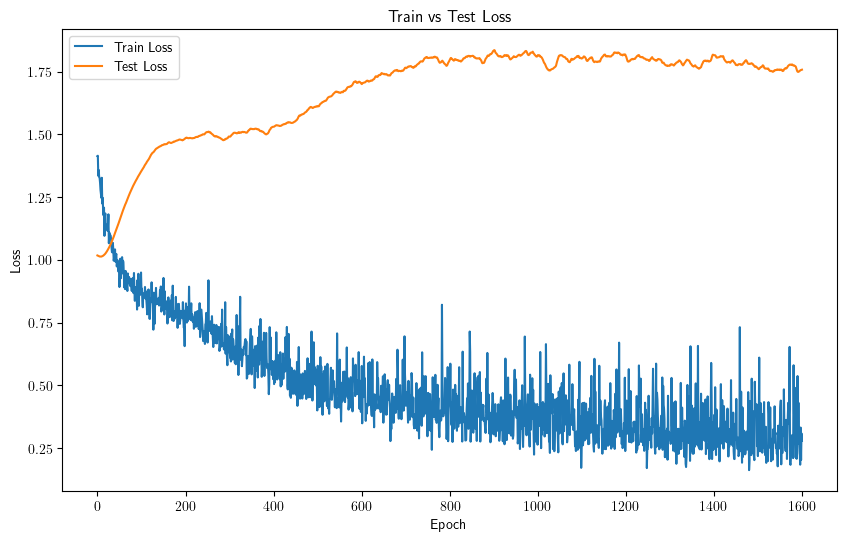

lr=0.001, hidden_dim=16, batch_size=8, epochs=1600

Final Train loss: 0.4080, Test loss: 2.1279 **

net_outputs_test[0] [ 1.7923918  1.8142567  1.8361217 ... -3.0810845 -3.3540804 -3.6270761]
Prediction min: -3.6270761
Prediction max: 1.8971322


/Users/chexuanyou/anaconda3/envs/myenv/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1024])) that is different to the input size (torch.Size([1024, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/chexuanyou/anaconda3/envs/myenv/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


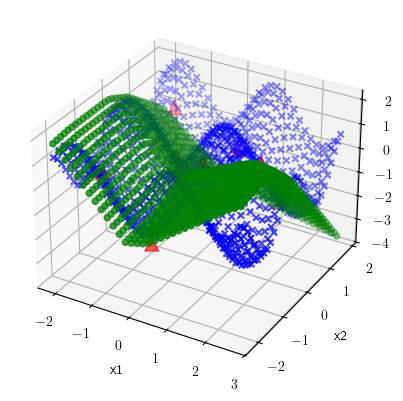

************************************************************************

**Running training with lr=0.002, hidden_dim=16, batch_size=8, epochs=1600
Epoch 1599/1600, Loss=0.2388
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.05, inplace=False)
    (3): Linear(in_features=16, out_features=1, bias=True)
  )
)


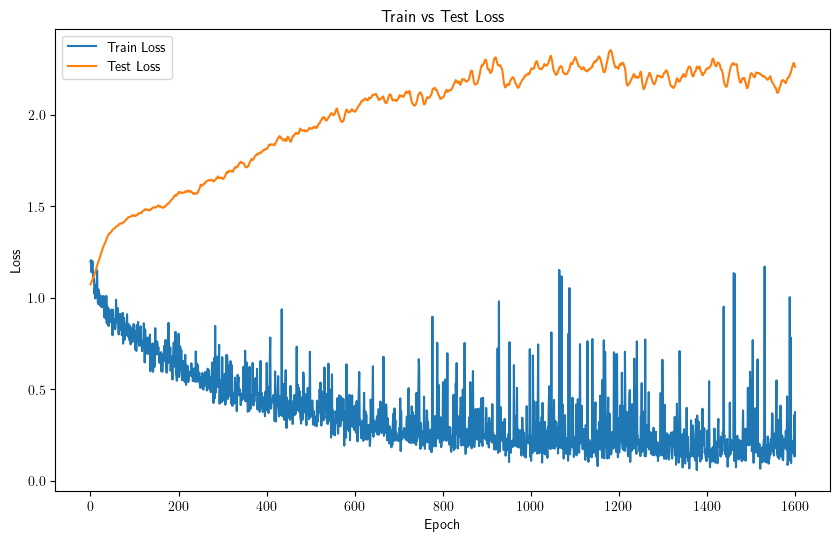

lr=0.002, hidden_dim=16, batch_size=8, epochs=1600

Final Train loss: 0.2979, Test loss: 1.8078 **

net_outputs_test[0] [ 1.2218056  1.3527572  1.4837085 ... -2.6253517 -2.8541174 -3.0828838]
Prediction min: -3.0828838
Prediction max: 2.9181504


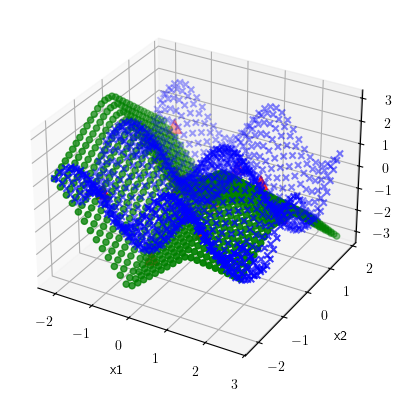

************************************************************************

**Running training with lr=0.002, hidden_dim=32, batch_size=8, epochs=1600
Epoch 1599/1600, Loss=0.1542
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.05, inplace=False)
    (3): Linear(in_features=32, out_features=1, bias=True)
  )
)


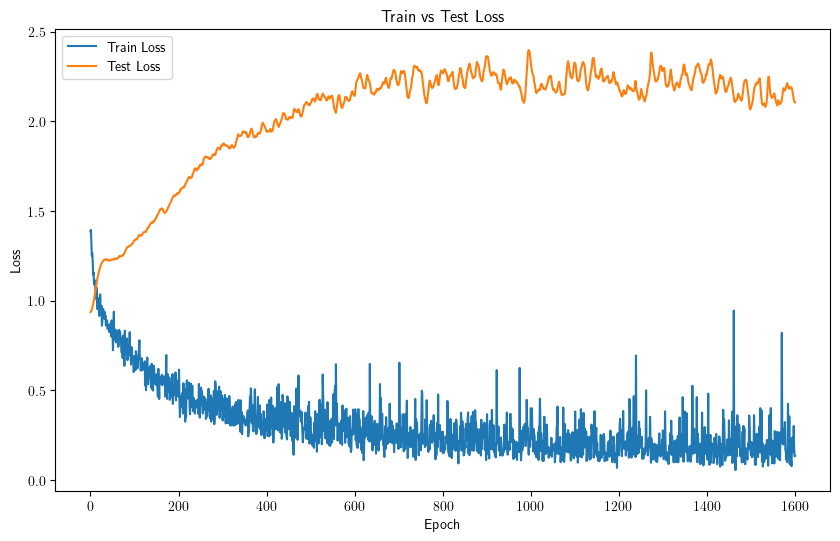

lr=0.002, hidden_dim=32, batch_size=8, epochs=1600

Final Train loss: 0.1678, Test loss: 1.1477 **

net_outputs_test[0] [ 1.21999    1.2631499  1.3063098 ... -2.7774813 -3.0242546 -3.0893025]
Prediction min: -3.0893025
Prediction max: 1.9652827


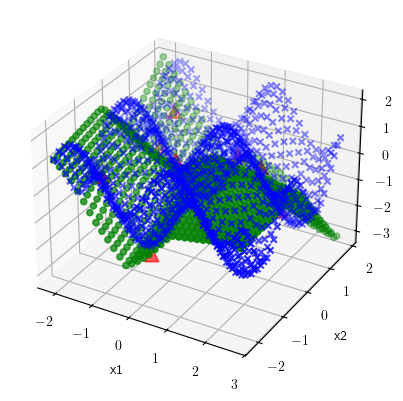

************************************************************************

**Running training with lr=0.002, hidden_dim=16, batch_size=8, epochs=2000
Epoch 1999/2000, Loss=0.4451
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.05, inplace=False)
    (3): Linear(in_features=16, out_features=1, bias=True)
  )
)


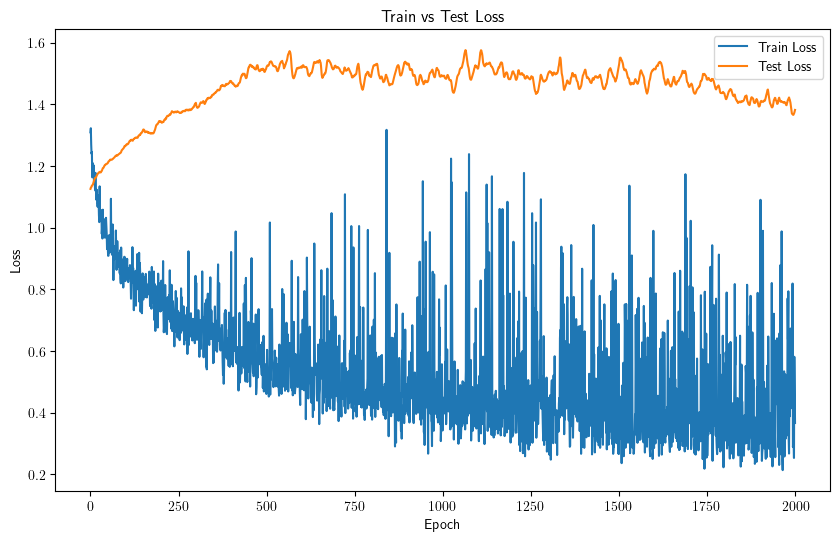

lr=0.002, hidden_dim=16, batch_size=8, epochs=2000

Final Train loss: 0.2727, Test loss: 2.5441 **

net_outputs_test[0] [ 1.2725723  1.4207506  1.5689285 ... -4.6582108 -5.0886664 -5.5191216]
Prediction min: -5.5191216
Prediction max: 2.3403687


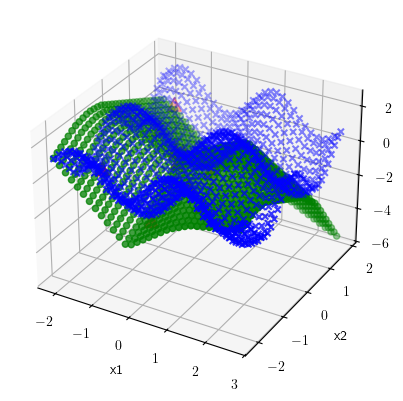

************************************************************************

**Running training with lr=0.003, hidden_dim=16, batch_size=8, epochs=1600
Epoch 1599/1600, Loss=0.5684
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.05, inplace=False)
    (3): Linear(in_features=16, out_features=1, bias=True)
  )
)


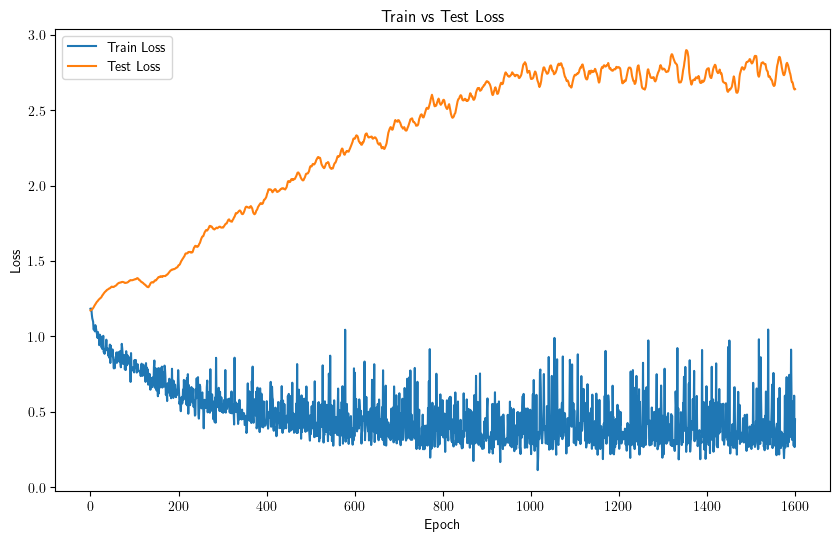

lr=0.003, hidden_dim=16, batch_size=8, epochs=1600

Final Train loss: 0.2198, Test loss: 0.9809 **

net_outputs_test[0] [ 1.312705   1.3509471  1.3891895 ... -2.9089444 -2.973256  -3.0375674]
Prediction min: -3.0375674
Prediction max: 3.0081737


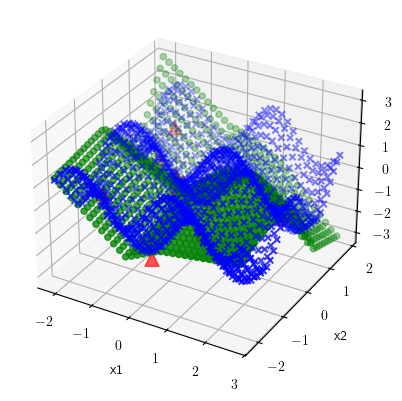

************************************************************************

**Running training with lr=0.003, hidden_dim=32, batch_size=8, epochs=1600
Epoch 1599/1600, Loss=0.1898
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.05, inplace=False)
    (3): Linear(in_features=32, out_features=1, bias=True)
  )
)


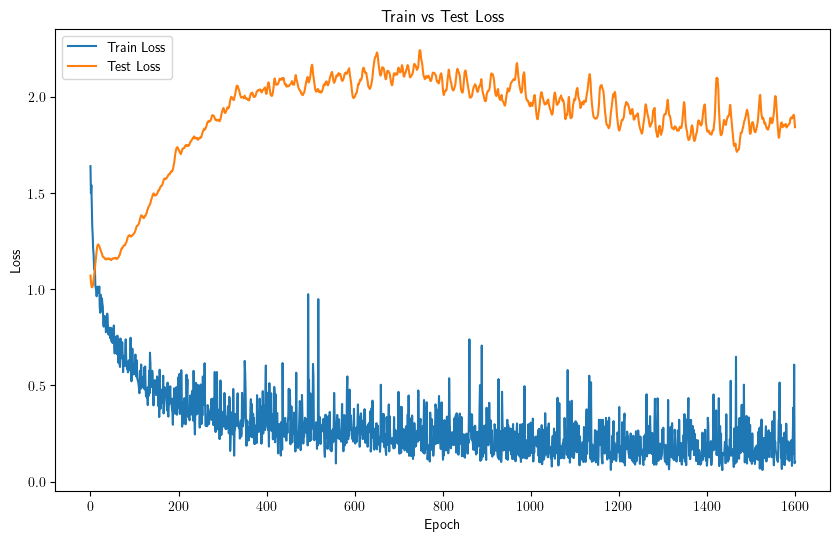

lr=0.003, hidden_dim=32, batch_size=8, epochs=1600

Final Train loss: 0.0951, Test loss: 1.6875 **

net_outputs_test[0] [ 2.3872912  2.4177573  2.448223  ... -2.5860124 -2.4891284 -2.2761002]
Prediction min: -2.7325926
Prediction max: 3.3660185


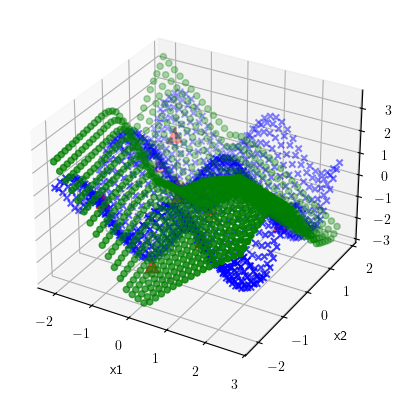

************************************************************************

**Running training with lr=0.003, hidden_dim=32, batch_size=8, epochs=2000
Epoch 1999/2000, Loss=0.0893
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.05, inplace=False)
    (3): Linear(in_features=32, out_features=1, bias=True)
  )
)


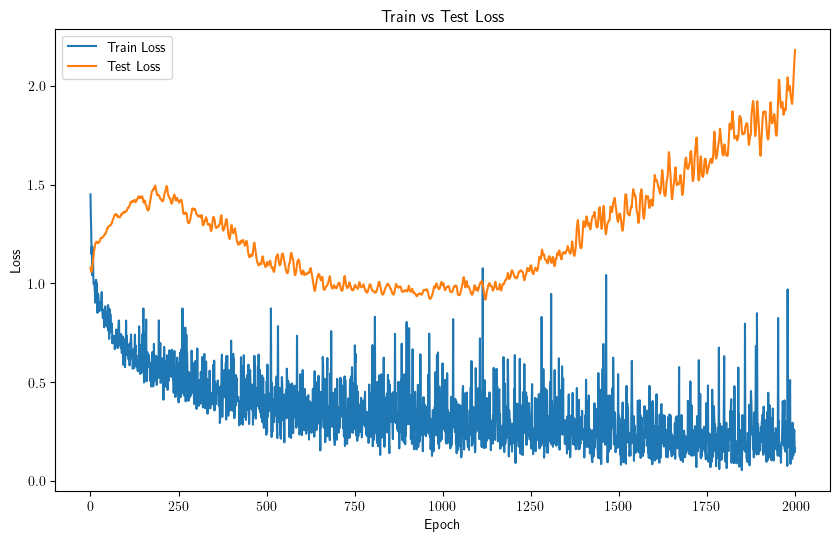

lr=0.003, hidden_dim=32, batch_size=8, epochs=2000

Final Train loss: 0.0894, Test loss: 1.3692 **

net_outputs_test[0] [ 2.6647959  2.7362816  2.8077676 ... -1.1210941 -1.1117265 -0.9689805]
Prediction min: -2.5043662
Prediction max: 3.596116


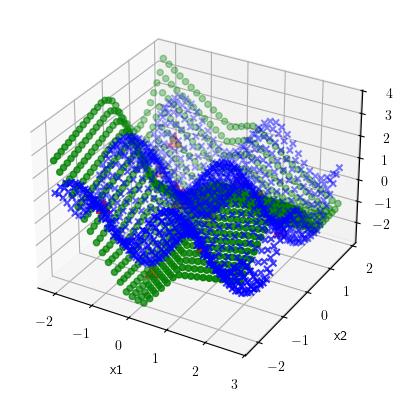

************************************************************************


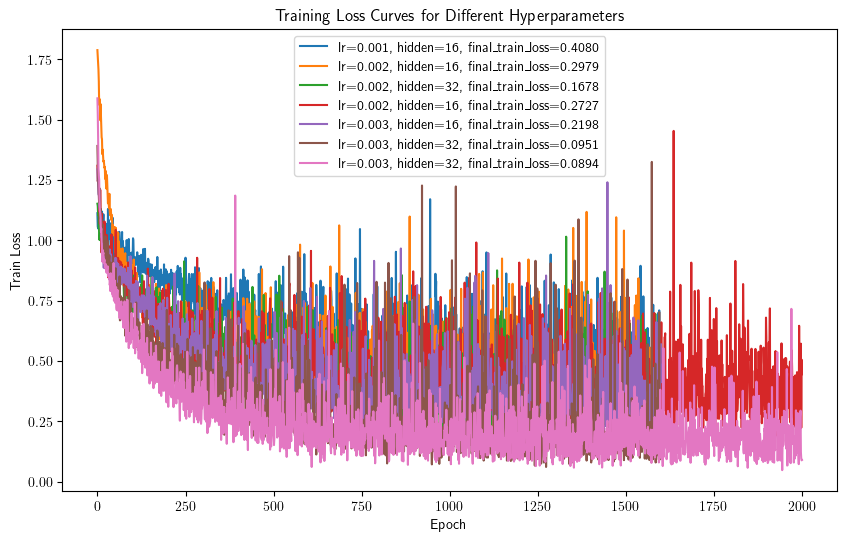


Comparison of final results:
Config: lr=0.001, hidden_dim=16, epoch=1600 => Train Loss=0.4080, Test Loss=2.1279
Config: lr=0.002, hidden_dim=16, epoch=1600 => Train Loss=0.2979, Test Loss=1.8078
Config: lr=0.002, hidden_dim=32, epoch=1600 => Train Loss=0.1678, Test Loss=1.1477
Config: lr=0.002, hidden_dim=16, epoch=2000 => Train Loss=0.2727, Test Loss=2.5441
Config: lr=0.003, hidden_dim=16, epoch=1600 => Train Loss=0.2198, Test Loss=0.9809
Config: lr=0.003, hidden_dim=32, epoch=1600 => Train Loss=0.0951, Test Loss=1.6875
Config: lr=0.003, hidden_dim=32, epoch=2000 => Train Loss=0.0894, Test Loss=1.3692


In [117]:
###############################################Modified Code to 3D#########################################################
#############################different Hyperparameters new version with test loss  and add normalization and dropout#####################################################
# #####################################################
# Import matplotlib for plotting purposes
import matplotlib
matplotlib.rcParams["text.usetex"] = True
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Sometimes, we need Numpy, but wherever possible, we prefer torch.
import numpy as np

# Import PyTorch
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# Float (32 bit) or Double (64 bit) precision? Choose!
torch.set_default_dtype(torch.float32)#64)
torch.set_num_threads(4) # Use _maximally_ 4 CPU cores

# This is a list to store the losses of the different hyperparameter configurations
train_losses_all = []
test_losses_all = []
models = []

# This is a list to store the hyperparameters of the training
# hyperparam_log = []

#device = torch.device("cpu")
# Choose a device for major calculations (if there is a special GPU card, you usually want that).
# My GPU is not very performant for double precision, so I stay on CPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")
device = torch.device(device)

# File path for saving the trained NN later.
# If only providing the file name (like here), the file will be generated in the same folder as the Python script
model_file = "mymodel.torch"

## The following script shows a data-driven training of a Neural Network.
## The data is generated in this script, too, by sampling from a function.
## The variables below are used to control this sampling
samples = 16
sample_min = -5
sample_max = 5
sample_span = sample_max - sample_min

## These parameters are usual hyperparameters of the NN and its training.
# batch_size = 8 # How many samples shall be presented to the NN, before running another optimizer step?
# hidden_dim = 16 # How many neurons shall there be in the hidden layer(s)?
input_dim = 2 # Input dimension of the NN (i.e. how many neurons are in the input layer?)
output_dim = 1 # Some for output

epochs = 2000 # Number of training iterations to be performed
lr = 0.002 # Which learning rate is passed to the training algorithm?

## Choose a criterion to evaluate the results. Here, we choose Mean Square error.
## The term "loss" means about the same as "remaining error" or "residual".
criterion = nn.MSELoss(reduction="mean")

## Here, we create the training data. In this example, we draw samples within the sampling interval and then pass it to
## e.g. the sin function (choose other functions to experiment with this script)
train_x = (sample_span * torch.rand(samples, 2) + sample_min * torch.ones(samples, 2))
train_y = torch.sin(train_x[:, 0]) + torch.cos(train_x[:, 1]) ##torch.pow(test_x, 2)


# add noise to the training data
noise_level = 0.3  # noise level
train_y += noise_level * torch.randn_like(train_y)

## This function logs the hyperparameters of the training
def log_hyperparameters(config, train_loss, test_loss, train_losses):
    hyperparam_log.append({
        "learning_rate": config["lr"],
        "hidden_dim": config["hidden_dim"],
        "batch_size": config["batch_size"],
        "epochs": config["epochs"],
        "final_train_loss": train_loss,
        "final_test_loss": test_loss,
        "train_losses": train_losses  # Include train_losses here
    })

# print ("train_x", train_x)
# print ("train_y", train_y)

## Here, we create the test data. To show the effect of extrapolation and the detailed behavior of the NN,
## we choose points a bit outside the interval that we used for sampling training data. Also, we very dense points.
# test_x = torch.zeros(20*samples, 2)
# test_x[:, 0] = torch.linspace(sample_min - 0.5*sample_span, sample_max + 0.5*sample_span, test_x.size()[0])
# test_x[:, 1] = torch.linspace(sample_min - 0.5*sample_span, sample_max + 0.5*sample_span, test_x.size()[0])

# create test_x with meshgrid
grid_size = int(samples ** 0.5) * 2 
margin = 1  # only extend 1. from -5 to 5, extend to -6 to 6 
x1 = torch.linspace(sample_min - margin, sample_max + margin, 2*samples)
x2 = torch.linspace(sample_min - margin, sample_max + margin, 2*samples)
x1, x2 = torch.meshgrid(x1, x2) 
test_x = torch.zeros(2*samples*2*samples, 2)
test_x[:, 0] = x1.reshape(-1)
test_x[:, 1] = x2.reshape(-1)
test_y = torch.sin(test_x[:, 0]) + torch.cos(test_x[:, 1]) ##torch.pow(test_x, 2)

# standardize the data
scaler = StandardScaler()
train_x = torch.tensor(scaler.fit_transform(train_x), dtype=torch.float32)
test_x = torch.tensor(scaler.transform(test_x), dtype=torch.float32)

## We want a DataLoader to handle batching and shuffling of the training data for us.
## The DataLoader needs a TensorDataset, hence we create one from the Training data.
train_data = TensorDataset(train_x, train_y)
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=False)


## This class creates the actual Neural Network.
class MLNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLNet, self).__init__()
        self.hidden_dim = hidden_dim

        ## In this case, I decided to pack the layers into a single container of type nn.Sequential
        ## This container is useful for Fully Connected NNs, where the output of each layer is just fed into the following layer.
        ## added dropout layer, which is a regularization technique to prevent overfitting
        self.fcnn1 = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            #nn.Tanh(),
            nn.ReLU(),
            #nn.Linear(hidden_dim, hidden_dim),
            #nn.ReLU(),
            #nn.Linear(hidden_dim, hidden_dim),
            nn.Dropout(p=0.05),  # Dropout layer with 30% of neurons being dropped，but it's not working well，the model underfitting, so change to 0.05
            #nn.ReLU(),
            nn.Linear(hidden_dim, output_dim),
        ) ## That network here has exactly 1 hidden layer (comment out some lines or write new ones to add more layers)
        ## nn.Linear is in the pictures represented by the arrows and has the weights (and biases) which are the
        ## parameters of the NN.
        ## nn.ReLU and Tanh are examples for activation functions - in the pictures, these are the bubbles / neurons.
        ## Usually, the pattern is interchanging between one linear layer, one activation function, one linear layer, one activation function and so on

    ## It is required to write a function that is executed when calling the NN model.
    ## Usually, it takes the input data and passes it through the layers.
    ## Here, it is sufficient to call the sequential container since this container does exactly this job.
    ## But this function "forward" could also be used to set up more complex NN architectures with more complex data flows
    def forward(self, x):
        out = self.fcnn1(x)
        return out

## This function performs a test run with the NN.
## It takes the NN model and the test data, passes the test inputs through the network and
## compares it with the target values = test outputs = targets
## and based on that calculates the loss value
def evaluate(model, test_x, test_y):
    ## For testing, we don't need the autograd feature/ protocol of all calculation steps
    ## So, save some time and disable grad tracking.
    with torch.no_grad():
        model.eval() ## Set the NN model into evaluation mode
        outputs = [] ## Create empty lists to store the results
        targets = []
        testlosses = []

        out = model(test_x.to(device)) ## Call the model, i.e. perform the actual inference

        ## Move the output quantities to the CPU, detach them from the tensor operation book-keeping and convert them to numpy arrays/ vectors.
        ## This is all necessary for plotting
        outputs.append(out.cpu().detach().numpy())
        targets.append(test_y.cpu().detach().numpy())
        testlosses.append(criterion(out, test_y.to(device)).item())

    ## Now return that in form of a triple of variables
    return outputs, targets, testlosses

## This calls the evaluate function and takes care of the plotting.
def eval_and_plot(model):
        ## matplotlib tries to be similar to the plot functions of matlab  (admittedly, the commands have to begin with "plt.", but the rest
        ## is quite similar.)

        # create a 3D plot
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        ## Call the network on the test data
        net_outputs_test, targets_test, testlosses = evaluate(model, test_x, test_y)   
        # Plot the targets first in blue (which means to plot the actual function over the whole test interval)
        #ax.plot(test_x[:, 0], test_x[:, 1], targets_test[0], color="-b", label="Target")
        ax.scatter(test_x[:, 0], test_x[:, 1], targets_test[0], c='b', marker='x', label='Target')
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('y')

        ## Call the network on the training data
        net_outputs_train, targets_train, testlosses = evaluate(model, train_x, train_y)
        ## First, plot the targets in red, i.e. plot the training data set
        ax.scatter(train_x[:, 0], train_x[:, 1], targets_train[0], c='r', s=100, marker='^', label='Target')

        ## Now, plot the output of the NN on the whole test interval in green
        ## This allows us to see how the NN performs for interpolation as well as for extrapolation
        ax.scatter(test_x[:, 0], test_x[:, 1], net_outputs_test[0].reshape(-1), c='g', marker='o', label='Learned')
        print("net_outputs_test[0]", net_outputs_test[0].reshape(-1))

        print("Prediction min:", net_outputs_test[0].min())
        print("Prediction max:", net_outputs_test[0].max())


        ## All plotting is done, open the plot window
        plt.show()

## This function takes care of the whole training, with logging of the training losses and test losses
def train_with_logging(train_loader, lr_run, hidden_dim_run, EPOCHS):
    model = MLNet(input_dim, hidden_dim_run, output_dim).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr_run, weight_decay=1e-5)

    train_losses = []
    test_losses = []

    for epoch in range(EPOCHS):
        model.train()
        avg_loss = 0.
        for x, label in train_loader:
            model.zero_grad()
            out = model(x.to(device)).squeeze(-1)
            loss = criterion(out, label.to(device))
            loss.backward()
            optimizer.step()
            avg_loss += loss.item()
        train_losses.append(avg_loss / len(train_loader))

        # Evaluate on test data
        with torch.no_grad():
            model.eval()
            test_out = model(test_x.to(device)).squeeze(-1)
            test_loss = criterion(test_out, test_y.to(device)).item()
            test_losses.append(test_loss)
    return model, train_losses, test_losses

## As the functions written before are just function definitions,
## those functions still have to be called.
## This is done here.
## Train the model
# model = train(train_loader, lr, epochs)

## Test that saving the model worked: load it from file
# model = torch.load(model_file)
## and evaluate and plot once
# eval_and_plot(model)

###################### Hyperparameter Search Loop ######################
hyperparam_log = []  # reset hyperparam_log

hyperparam_configs = [
    {"lr":0.001, "hidden_dim":16, "batch_size":8, "epochs":1600},
    {"lr":0.002, "hidden_dim":16, "batch_size":8, "epochs":1600},
    {"lr":0.002, "hidden_dim":32, "batch_size":8, "epochs":1600},
    {"lr":0.002, "hidden_dim":16, "batch_size":8, "epochs":2000},
    {"lr":0.003, "hidden_dim":16, "batch_size":8, "epochs":1600},
    {"lr":0.003, "hidden_dim":32, "batch_size":8, "epochs":1600},
    {"lr":0.003, "hidden_dim":32, "batch_size":8, "epochs":2000},
]

for config in hyperparam_configs:
    lr_run          = config["lr"]
    hidden_dim_run  = config["hidden_dim"]
    batch_size_run  = config["batch_size"]
    epochs_run      = config["epochs"]

    # update hyperparameters to be global variables
    lr         = lr_run
    hidden_dim = hidden_dim_run
    batch_size = batch_size_run
    epochs     = epochs_run

    print(f"\n**Running training with lr={lr}, hidden_dim={hidden_dim}, batch_size={batch_size}, epochs={epochs}")

    # train the model to get the results
    model, train_curve, final_train_loss, final_test_loss = train(train_loader, lr, hidden_dim, epochs)

    # show the model structure
    print(model)
    # Train the model with logging
    model1, train_losses, test_losses = train_with_logging(train_loader, lr, hidden_dim, epochs)

    # Plot the losses
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(train_losses)), train_losses, label="Train Loss")
    plt.plot(range(len(test_losses)), test_losses, label="Test Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Train vs Test Loss")
    plt.legend()
    plt.show()
    # save to hyperparam_log
    log_hyperparameters(config, final_train_loss, final_test_loss, train_curve)
    
    print(f"lr={lr}, hidden_dim={hidden_dim}, batch_size={batch_size}, epochs={epochs}\n")
    print(f"Final Train loss: {final_train_loss:.4f}, Test loss: {final_test_loss:.4f} **\n")
    eval_and_plot(model)  # plot the training results
    print("************************************************************************")

###################### Plot multiple curves ######################
plt.figure(figsize=(10,6))
for entry in hyperparam_log:
    plt.plot(entry["train_losses"],
             label=f"lr={entry['learning_rate']}, hidden={entry['hidden_dim']}, final_train_loss={entry['final_train_loss']:.4f}")
plt.xlabel("Epoch")
plt.ylabel("Train Loss")
plt.title("Training Loss Curves for Different Hyperparameters")
plt.legend()
plt.show()

###################### Compare final results ######################
print("\nComparison of final results:")
for entry in hyperparam_log:
    print(f"Config: lr={entry['learning_rate']}, hidden_dim={entry['hidden_dim']}, epoch={entry['epochs']} => Train Loss={entry['final_train_loss']:.4f}, Test Loss={entry['final_test_loss']:.4f}")

## This function is used to plot the hyperparameter logs
#plot_hyperparameter_logs()

Using cpu device

**Running training with lr=0.001, hidden_dim=16, batch_size=8, epochs=1600
Epoch 1599/1600, Loss=0.3285
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.05, inplace=False)
    (3): Linear(in_features=16, out_features=1, bias=True)
  )
)


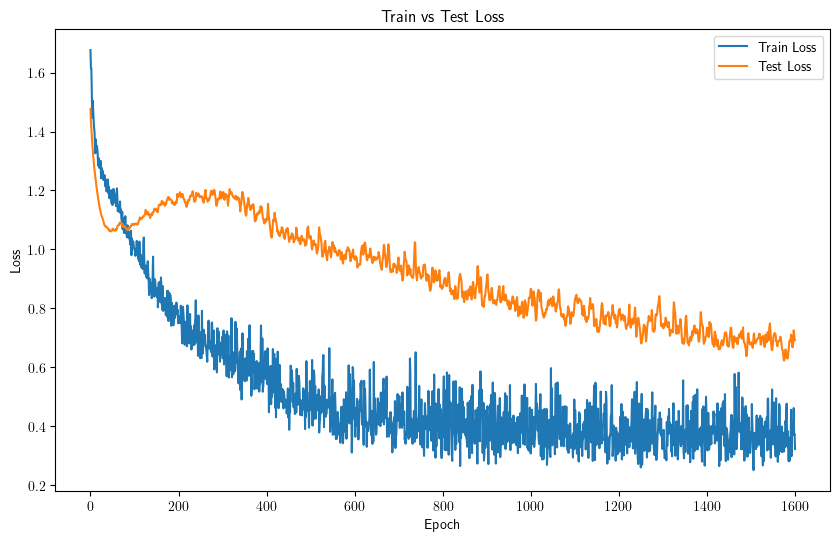

lr=0.001, hidden_dim=16, batch_size=8, epochs=1600

Final Train loss: 0.1956, Test loss: 0.9009 **



/Users/chexuanyou/anaconda3/envs/myenv/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16384])) that is different to the input size (torch.Size([16384, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/chexuanyou/anaconda3/envs/myenv/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


net_outputs_test[0] [-0.07107572 -0.02404742  0.02298085 ... -1.0786673  -1.0021522
 -0.9256372 ]
Prediction min: -3.722537
Prediction max: 2.7768667


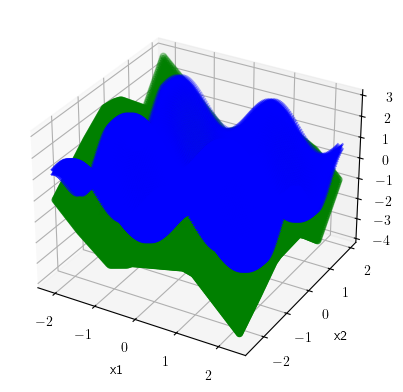

************************************************************************

**Running training with lr=0.002, hidden_dim=16, batch_size=8, epochs=1600
Epoch 1599/1600, Loss=0.5476
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.05, inplace=False)
    (3): Linear(in_features=16, out_features=1, bias=True)
  )
)


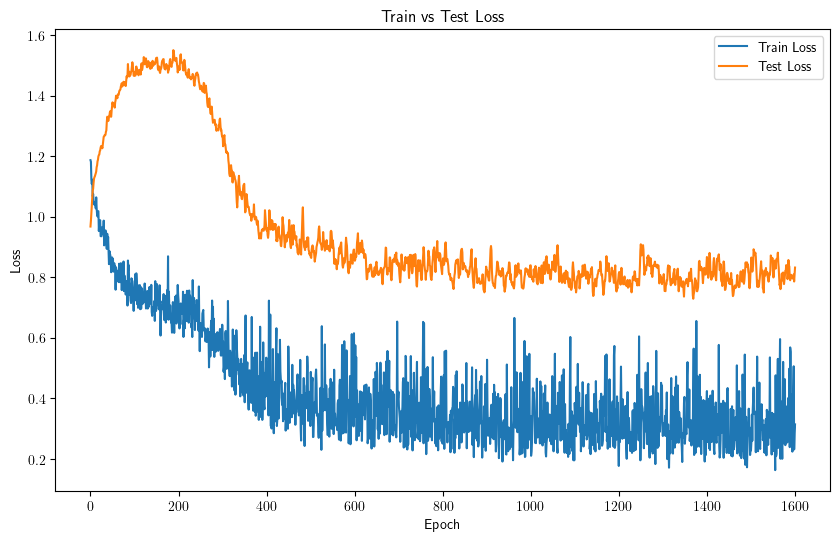

lr=0.002, hidden_dim=16, batch_size=8, epochs=1600

Final Train loss: 0.3817, Test loss: 1.0831 **

net_outputs_test[0] [-0.10108262 -0.04752952  0.00602382 ... -1.4510648  -1.4751852
 -1.4993055 ]
Prediction min: -2.6402807
Prediction max: 2.0628662


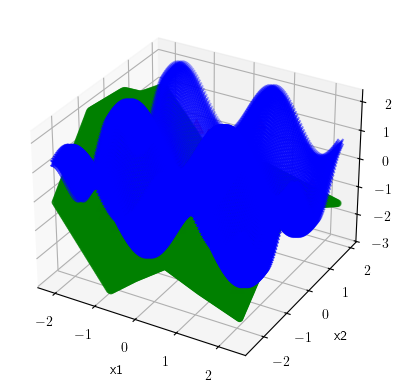

************************************************************************

**Running training with lr=0.002, hidden_dim=32, batch_size=8, epochs=1600
Epoch 1599/1600, Loss=0.2393
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.05, inplace=False)
    (3): Linear(in_features=32, out_features=1, bias=True)
  )
)


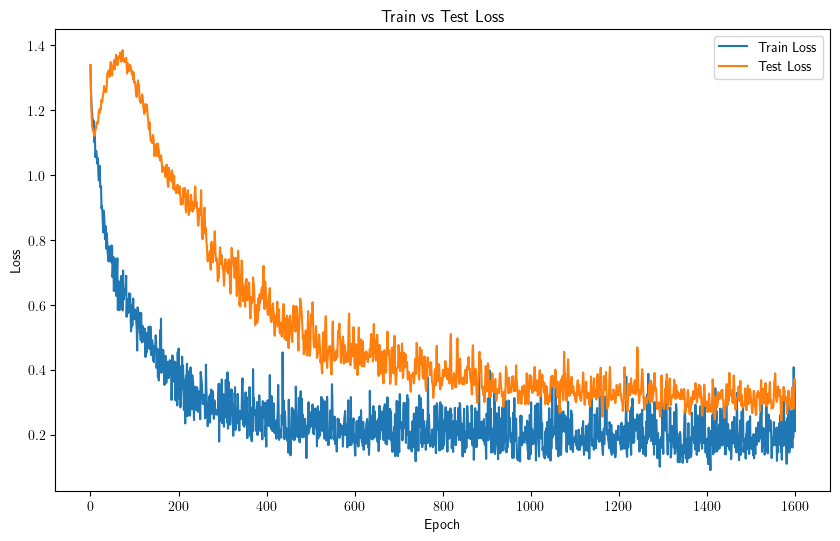

lr=0.002, hidden_dim=32, batch_size=8, epochs=1600

Final Train loss: 0.1325, Test loss: 0.9297 **

net_outputs_test[0] [ 0.15642291  0.19852191  0.24062136 ... -0.840059   -0.7321353
 -0.62421244]
Prediction min: -3.8612583
Prediction max: 3.3185444


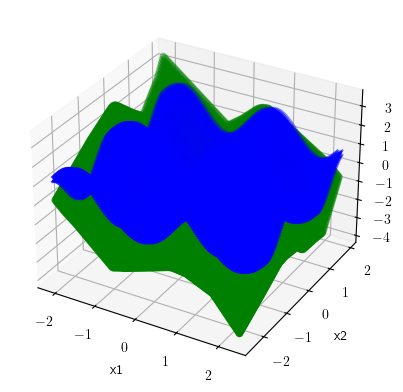

************************************************************************

**Running training with lr=0.002, hidden_dim=16, batch_size=8, epochs=2000
Epoch 1999/2000, Loss=0.3205
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.05, inplace=False)
    (3): Linear(in_features=16, out_features=1, bias=True)
  )
)


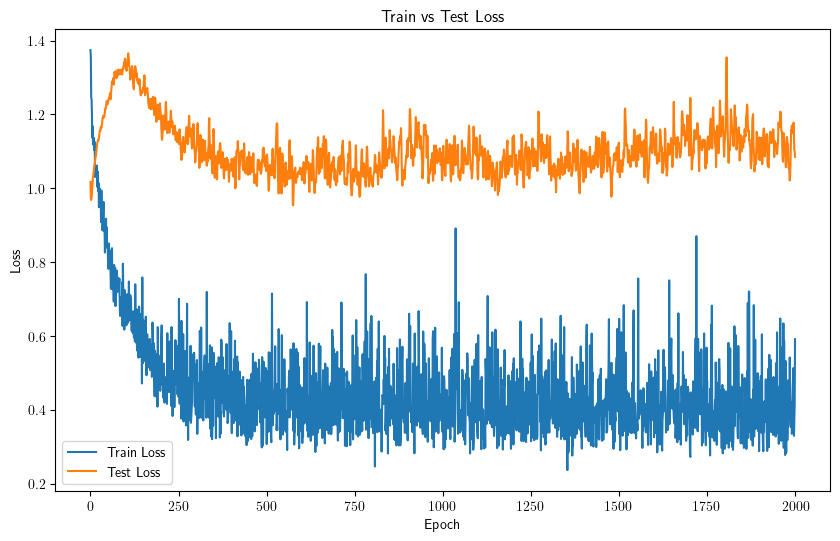

lr=0.002, hidden_dim=16, batch_size=8, epochs=2000

Final Train loss: 0.1895, Test loss: 0.7703 **

net_outputs_test[0] [ 0.13104075  0.17016393  0.20928772 ... -0.7555061  -0.6287598
 -0.50201297]
Prediction min: -3.6336715
Prediction max: 3.3644068


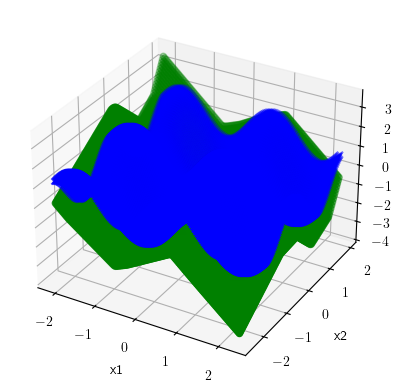

************************************************************************

**Running training with lr=0.003, hidden_dim=16, batch_size=8, epochs=1600
Epoch 1599/1600, Loss=0.3766
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.05, inplace=False)
    (3): Linear(in_features=16, out_features=1, bias=True)
  )
)


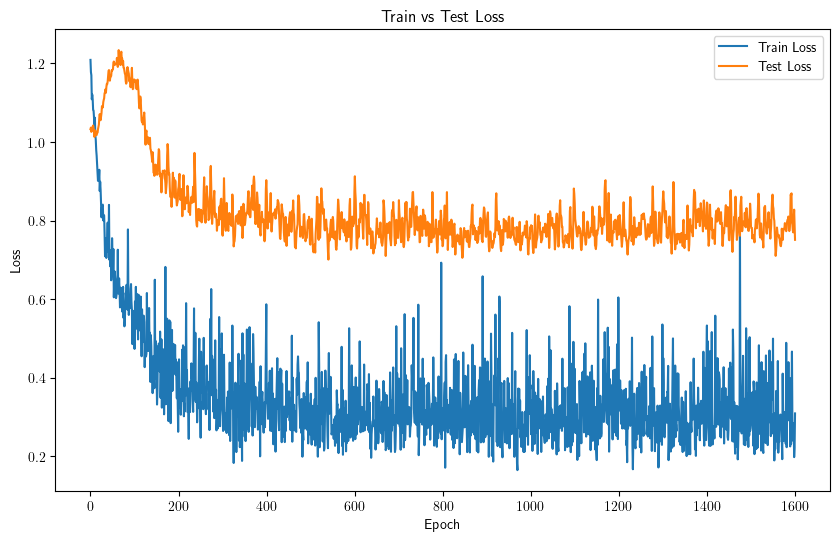

lr=0.003, hidden_dim=16, batch_size=8, epochs=1600

Final Train loss: 0.2778, Test loss: 1.1305 **

net_outputs_test[0] [-0.05175892 -0.01402757  0.02370405 ... -2.738828   -2.7524605
 -2.7660918 ]
Prediction min: -3.6482472
Prediction max: 2.2753038


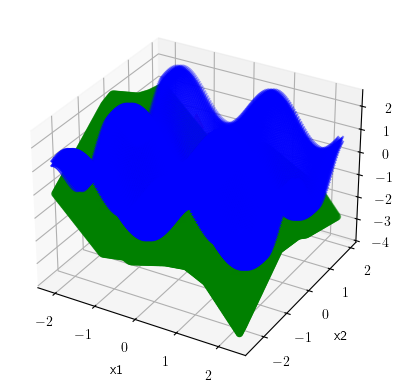

************************************************************************

**Running training with lr=0.003, hidden_dim=32, batch_size=8, epochs=1600
Epoch 1599/1600, Loss=0.1945
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.05, inplace=False)
    (3): Linear(in_features=32, out_features=1, bias=True)
  )
)


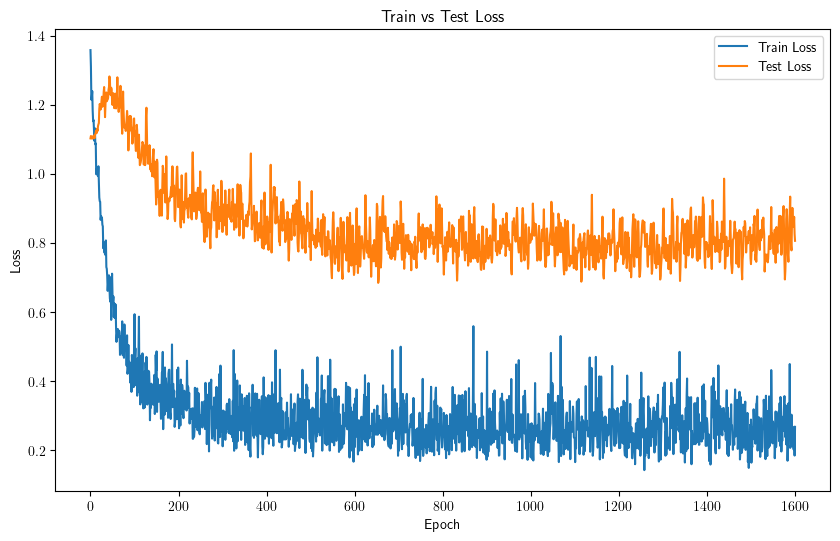

lr=0.003, hidden_dim=32, batch_size=8, epochs=1600

Final Train loss: 0.1426, Test loss: 0.9655 **

net_outputs_test[0] [-0.05925456 -0.00947469  0.0403052  ... -1.2517412  -1.1596525
 -1.0675629 ]
Prediction min: -3.847328
Prediction max: 3.3692946


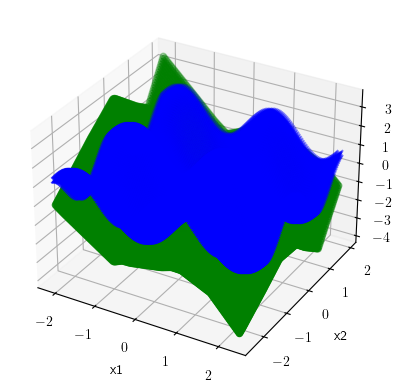

************************************************************************

**Running training with lr=0.003, hidden_dim=32, batch_size=8, epochs=2000
Epoch 1999/2000, Loss=0.2124
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.05, inplace=False)
    (3): Linear(in_features=32, out_features=1, bias=True)
  )
)


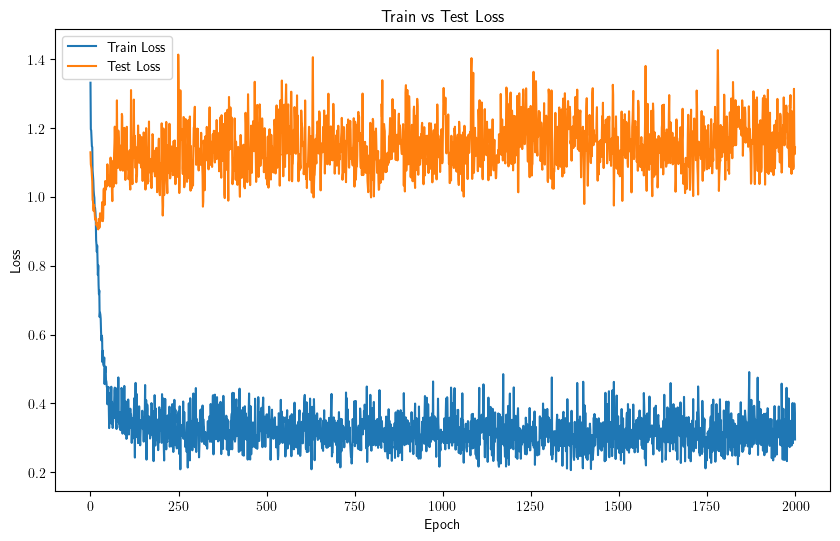

lr=0.003, hidden_dim=32, batch_size=8, epochs=2000

Final Train loss: 0.1576, Test loss: 0.9330 **

net_outputs_test[0] [-0.03410041  0.02433199  0.08276492 ... -0.81477445 -0.7270965
 -0.6394194 ]
Prediction min: -3.6378016
Prediction max: 4.000773


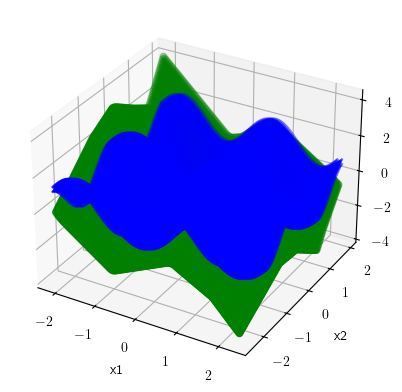

************************************************************************


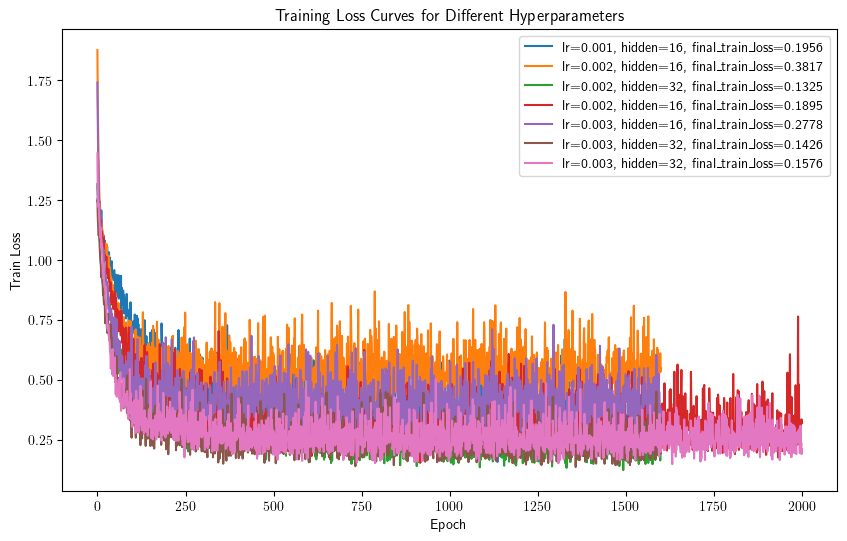


Comparison of final results:
Config: lr=0.001, hidden_dim=16, epoch=1600 => Train Loss=0.1956, Test Loss=0.9009
Config: lr=0.002, hidden_dim=16, epoch=1600 => Train Loss=0.3817, Test Loss=1.0831
Config: lr=0.002, hidden_dim=32, epoch=1600 => Train Loss=0.1325, Test Loss=0.9297
Config: lr=0.002, hidden_dim=16, epoch=2000 => Train Loss=0.1895, Test Loss=0.7703
Config: lr=0.003, hidden_dim=16, epoch=1600 => Train Loss=0.2778, Test Loss=1.1305
Config: lr=0.003, hidden_dim=32, epoch=1600 => Train Loss=0.1426, Test Loss=0.9655
Config: lr=0.003, hidden_dim=32, epoch=2000 => Train Loss=0.1576, Test Loss=0.9330


In [118]:
###############################################Modified Code to 3D#########################################################
#############################different Hyperparameters new version with test loss  and add normalization and dropout#####################################################
# #####################################################
# Import matplotlib for plotting purposes
import matplotlib
matplotlib.rcParams["text.usetex"] = True
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Sometimes, we need Numpy, but wherever possible, we prefer torch.
import numpy as np

# Import PyTorch
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# Float (32 bit) or Double (64 bit) precision? Choose!
torch.set_default_dtype(torch.float32)#64)
torch.set_num_threads(4) # Use _maximally_ 4 CPU cores

# This is a list to store the losses of the different hyperparameter configurations
train_losses_all = []
test_losses_all = []
models = []

# This is a list to store the hyperparameters of the training
# hyperparam_log = []

#device = torch.device("cpu")
# Choose a device for major calculations (if there is a special GPU card, you usually want that).
# My GPU is not very performant for double precision, so I stay on CPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")
device = torch.device(device)

# File path for saving the trained NN later.
# If only providing the file name (like here), the file will be generated in the same folder as the Python script
model_file = "mymodel.torch"

## The following script shows a data-driven training of a Neural Network.
## The data is generated in this script, too, by sampling from a function.
## The variables below are used to control this sampling
samples = 64
sample_min = -5
sample_max = 5
sample_span = sample_max - sample_min

## These parameters are usual hyperparameters of the NN and its training.
# batch_size = 8 # How many samples shall be presented to the NN, before running another optimizer step?
# hidden_dim = 16 # How many neurons shall there be in the hidden layer(s)?
input_dim = 2 # Input dimension of the NN (i.e. how many neurons are in the input layer?)
output_dim = 1 # Some for output

epochs = 2000 # Number of training iterations to be performed
lr = 0.002 # Which learning rate is passed to the training algorithm?

## Choose a criterion to evaluate the results. Here, we choose Mean Square error.
## The term "loss" means about the same as "remaining error" or "residual".
criterion = nn.MSELoss(reduction="mean")

## Here, we create the training data. In this example, we draw samples within the sampling interval and then pass it to
## e.g. the sin function (choose other functions to experiment with this script)
train_x = (sample_span * torch.rand(samples, 2) + sample_min * torch.ones(samples, 2))
train_y = torch.sin(train_x[:, 0]) + torch.cos(train_x[:, 1]) ##torch.pow(test_x, 2)


# add noise to the training data
noise_level = 0.3  # noise level
train_y += noise_level * torch.randn_like(train_y)

## This function logs the hyperparameters of the training
def log_hyperparameters(config, train_loss, test_loss, train_losses):
    hyperparam_log.append({
        "learning_rate": config["lr"],
        "hidden_dim": config["hidden_dim"],
        "batch_size": config["batch_size"],
        "epochs": config["epochs"],
        "final_train_loss": train_loss,
        "final_test_loss": test_loss,
        "train_losses": train_losses  # Include train_losses here
    })

# print ("train_x", train_x)
# print ("train_y", train_y)

## Here, we create the test data. To show the effect of extrapolation and the detailed behavior of the NN,
## we choose points a bit outside the interval that we used for sampling training data. Also, we very dense points.
# test_x = torch.zeros(20*samples, 2)
# test_x[:, 0] = torch.linspace(sample_min - 0.5*sample_span, sample_max + 0.5*sample_span, test_x.size()[0])
# test_x[:, 1] = torch.linspace(sample_min - 0.5*sample_span, sample_max + 0.5*sample_span, test_x.size()[0])

# create test_x with meshgrid
grid_size = int(samples ** 0.5) * 2 
margin = 1  # only extend 1. from -5 to 5, extend to -6 to 6 
x1 = torch.linspace(sample_min - margin, sample_max + margin, 2*samples)
x2 = torch.linspace(sample_min - margin, sample_max + margin, 2*samples)
x1, x2 = torch.meshgrid(x1, x2) 
test_x = torch.zeros(2*samples*2*samples, 2)
test_x[:, 0] = x1.reshape(-1)
test_x[:, 1] = x2.reshape(-1)
test_y = torch.sin(test_x[:, 0]) + torch.cos(test_x[:, 1]) ##torch.pow(test_x, 2)

# standardize the data
scaler = StandardScaler()
train_x = torch.tensor(scaler.fit_transform(train_x), dtype=torch.float32)
test_x = torch.tensor(scaler.transform(test_x), dtype=torch.float32)

## We want a DataLoader to handle batching and shuffling of the training data for us.
## The DataLoader needs a TensorDataset, hence we create one from the Training data.
train_data = TensorDataset(train_x, train_y)
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=False)


## This class creates the actual Neural Network.
class MLNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLNet, self).__init__()
        self.hidden_dim = hidden_dim

        ## In this case, I decided to pack the layers into a single container of type nn.Sequential
        ## This container is useful for Fully Connected NNs, where the output of each layer is just fed into the following layer.
        ## added dropout layer, which is a regularization technique to prevent overfitting
        self.fcnn1 = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            #nn.Tanh(),
            nn.ReLU(),
            #nn.Linear(hidden_dim, hidden_dim),
            #nn.ReLU(),
            #nn.Linear(hidden_dim, hidden_dim),
            nn.Dropout(p=0.05),  # Dropout layer with 30% of neurons being dropped，but it's not working well，the model underfitting, so change to 0.05
            #nn.ReLU(),
            nn.Linear(hidden_dim, output_dim),
        ) ## That network here has exactly 1 hidden layer (comment out some lines or write new ones to add more layers)
        ## nn.Linear is in the pictures represented by the arrows and has the weights (and biases) which are the
        ## parameters of the NN.
        ## nn.ReLU and Tanh are examples for activation functions - in the pictures, these are the bubbles / neurons.
        ## Usually, the pattern is interchanging between one linear layer, one activation function, one linear layer, one activation function and so on

    ## It is required to write a function that is executed when calling the NN model.
    ## Usually, it takes the input data and passes it through the layers.
    ## Here, it is sufficient to call the sequential container since this container does exactly this job.
    ## But this function "forward" could also be used to set up more complex NN architectures with more complex data flows
    def forward(self, x):
        out = self.fcnn1(x)
        return out

## This function performs a test run with the NN.
## It takes the NN model and the test data, passes the test inputs through the network and
## compares it with the target values = test outputs = targets
## and based on that calculates the loss value
def evaluate(model, test_x, test_y):
    ## For testing, we don't need the autograd feature/ protocol of all calculation steps
    ## So, save some time and disable grad tracking.
    with torch.no_grad():
        model.eval() ## Set the NN model into evaluation mode
        outputs = [] ## Create empty lists to store the results
        targets = []
        testlosses = []

        out = model(test_x.to(device)) ## Call the model, i.e. perform the actual inference

        ## Move the output quantities to the CPU, detach them from the tensor operation book-keeping and convert them to numpy arrays/ vectors.
        ## This is all necessary for plotting
        outputs.append(out.cpu().detach().numpy())
        targets.append(test_y.cpu().detach().numpy())
        testlosses.append(criterion(out, test_y.to(device)).item())

    ## Now return that in form of a triple of variables
    return outputs, targets, testlosses

## This calls the evaluate function and takes care of the plotting.
def eval_and_plot(model):
        ## matplotlib tries to be similar to the plot functions of matlab  (admittedly, the commands have to begin with "plt.", but the rest
        ## is quite similar.)

        # create a 3D plot
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        ## Call the network on the test data
        net_outputs_test, targets_test, testlosses = evaluate(model, test_x, test_y)   
        # Plot the targets first in blue (which means to plot the actual function over the whole test interval)
        #ax.plot(test_x[:, 0], test_x[:, 1], targets_test[0], color="-b", label="Target")
        ax.scatter(test_x[:, 0], test_x[:, 1], targets_test[0], c='b', marker='x', label='Target')
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('y')

        ## Call the network on the training data
        net_outputs_train, targets_train, testlosses = evaluate(model, train_x, train_y)
        ## First, plot the targets in red, i.e. plot the training data set
        ax.scatter(train_x[:, 0], train_x[:, 1], targets_train[0], c='r', s=100, marker='^', label='Target')

        ## Now, plot the output of the NN on the whole test interval in green
        ## This allows us to see how the NN performs for interpolation as well as for extrapolation
        ax.scatter(test_x[:, 0], test_x[:, 1], net_outputs_test[0].reshape(-1), c='g', marker='o', label='Learned')
        print("net_outputs_test[0]", net_outputs_test[0].reshape(-1))

        print("Prediction min:", net_outputs_test[0].min())
        print("Prediction max:", net_outputs_test[0].max())


        ## All plotting is done, open the plot window
        plt.show()

## This function takes care of the whole training, with logging of the training losses and test losses
def train_with_logging(train_loader, lr_run, hidden_dim_run, EPOCHS):
    model = MLNet(input_dim, hidden_dim_run, output_dim).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr_run, weight_decay=1e-5)

    train_losses = []
    test_losses = []

    for epoch in range(EPOCHS):
        model.train()
        avg_loss = 0.
        for x, label in train_loader:
            model.zero_grad()
            out = model(x.to(device)).squeeze(-1)
            loss = criterion(out, label.to(device))
            loss.backward()
            optimizer.step()
            avg_loss += loss.item()
        train_losses.append(avg_loss / len(train_loader))

        # Evaluate on test data
        with torch.no_grad():
            model.eval()
            test_out = model(test_x.to(device)).squeeze(-1)
            test_loss = criterion(test_out, test_y.to(device)).item()
            test_losses.append(test_loss)
    return model, train_losses, test_losses

## As the functions written before are just function definitions,
## those functions still have to be called.
## This is done here.
## Train the model
# model = train(train_loader, lr, epochs)

## Test that saving the model worked: load it from file
# model = torch.load(model_file)
## and evaluate and plot once
# eval_and_plot(model)

###################### Hyperparameter Search Loop ######################
hyperparam_log = []  # reset hyperparam_log

hyperparam_configs = [
    {"lr":0.001, "hidden_dim":16, "batch_size":8, "epochs":1600},
    {"lr":0.002, "hidden_dim":16, "batch_size":8, "epochs":1600},
    {"lr":0.002, "hidden_dim":32, "batch_size":8, "epochs":1600},
    {"lr":0.002, "hidden_dim":16, "batch_size":8, "epochs":2000},
    {"lr":0.003, "hidden_dim":16, "batch_size":8, "epochs":1600},
    {"lr":0.003, "hidden_dim":32, "batch_size":8, "epochs":1600},
    {"lr":0.003, "hidden_dim":32, "batch_size":8, "epochs":2000},
]

for config in hyperparam_configs:
    lr_run          = config["lr"]
    hidden_dim_run  = config["hidden_dim"]
    batch_size_run  = config["batch_size"]
    epochs_run      = config["epochs"]

    # update hyperparameters to be global variables
    lr         = lr_run
    hidden_dim = hidden_dim_run
    batch_size = batch_size_run
    epochs     = epochs_run

    print(f"\n**Running training with lr={lr}, hidden_dim={hidden_dim}, batch_size={batch_size}, epochs={epochs}")

    # train the model to get the results
    model, train_curve, final_train_loss, final_test_loss = train(train_loader, lr, hidden_dim, epochs)

    # show the model structure
    print(model)
    # Train the model with logging
    model1, train_losses, test_losses = train_with_logging(train_loader, lr, hidden_dim, epochs)

    # Plot the losses
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(train_losses)), train_losses, label="Train Loss")
    plt.plot(range(len(test_losses)), test_losses, label="Test Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Train vs Test Loss")
    plt.legend()
    plt.show()
    # save to hyperparam_log
    log_hyperparameters(config, final_train_loss, final_test_loss, train_curve)
    
    print(f"lr={lr}, hidden_dim={hidden_dim}, batch_size={batch_size}, epochs={epochs}\n")
    print(f"Final Train loss: {final_train_loss:.4f}, Test loss: {final_test_loss:.4f} **\n")
    eval_and_plot(model)  # plot the training results
    print("************************************************************************")

###################### Plot multiple curves ######################
plt.figure(figsize=(10,6))
for entry in hyperparam_log:
    plt.plot(entry["train_losses"],
             label=f"lr={entry['learning_rate']}, hidden={entry['hidden_dim']}, final_train_loss={entry['final_train_loss']:.4f}")
plt.xlabel("Epoch")
plt.ylabel("Train Loss")
plt.title("Training Loss Curves for Different Hyperparameters")
plt.legend()
plt.show()

###################### Compare final results ######################
print("\nComparison of final results:")
for entry in hyperparam_log:
    print(f"Config: lr={entry['learning_rate']}, hidden_dim={entry['hidden_dim']}, epoch={entry['epochs']} => Train Loss={entry['final_train_loss']:.4f}, Test Loss={entry['final_test_loss']:.4f}")

## This function is used to plot the hyperparameter logs
#plot_hyperparameter_logs()